In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('FX_EURUSD.csv')
df.set_index('time')
df.head()

,time,open,high,low,close,SMA #1,SMA #2,SMA #3,SMA #4,SMA #5,...,EMA 40,EMA 45,EMA 50,EMA 55,EMA 200,LONG,SHORT,DEMA,Volume,Volume MA
0,2015-01-02T09:00:00+07:00,1.20991,1.20991,1.20460,1.20516,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9602,NaN
1,2015-01-02T13:00:00+07:00,1.20516,1.20696,1.20345,1.20579,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46744,NaN
2,2015-01-02T17:00:00+07:00,1.20579,1.20582,1.20256,1.20308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37434,NaN
3,2015-01-02T21:00:00+07:00,1.20308,1.20335,1.20037,1.20097,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52610,NaN
4,2015-01-03T01:00:00+07:00,1.20097,1.20155,1.19980,1.19994,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13246,NaN


In [3]:
df_data = df[['time','open','high','low','close','MA','EMA']]
df_data.head()

,time,open,high,low,close,MA,EMA
0,2015-01-02T09:00:00+07:00,1.20991,1.20991,1.20460,1.20516,NaN,NaN
1,2015-01-02T13:00:00+07:00,1.20516,1.20696,1.20345,1.20579,NaN,NaN
2,2015-01-02T17:00:00+07:00,1.20579,1.20582,1.20256,1.20308,NaN,NaN
3,2015-01-02T21:00:00+07:00,1.20308,1.20335,1.20037,1.20097,NaN,NaN
4,2015-01-03T01:00:00+07:00,1.20097,1.20155,1.19980,1.19994,NaN,NaN


In [4]:
df_data.describe()

,open,high,low,close,MA,EMA
count,11477.000000,11477.000000,11477.000000,11477.000000,11469.000000,11469.000000
mean,1.136974,1.138579,1.135421,1.136968,1.136973,1.136974
std,0.045419,0.045303,0.045502,0.045420,0.045310,0.045269
min,1.035780,1.038280,1.034010,1.035780,1.039191,1.040078
25%,1.105100,1.106720,1.103490,1.105110,1.104993,1.105236
50%,1.130160,1.131910,1.128640,1.130160,1.130161,1.130155
75%,1.174230,1.175610,1.172930,1.174230,1.174373,1.174450
max,1.254890,1.255570,1.252310,1.254890,1.249493,1.249062


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11477 non-null  object 
 1   open    11477 non-null  float64
 2   high    11477 non-null  float64
 3   low     11477 non-null  float64
 4   close   11477 non-null  float64
 5   MA      11469 non-null  float64
 6   EMA     11469 non-null  float64
dtypes: float64(6), object(1)
memory usage: 627.8+ KB


In [6]:
df_data.dropna(inplace=True)
df_data

,time,open,high,low,close,MA,EMA
8,2015-01-05T17:00:00+07:00,1.19543,1.19570,1.18870,1.19130,1.198959,1.198959
9,2015-01-05T21:00:00+07:00,1.19130,1.19414,1.19086,1.19231,1.197531,1.197629
10,2015-01-06T01:00:00+07:00,1.19231,1.19495,1.19146,1.19324,1.196137,1.196751
11,2015-01-06T05:00:00+07:00,1.19324,1.19462,1.19268,1.19408,1.195137,1.196217
12,2015-01-06T09:00:00+07:00,1.19408,1.19582,1.19404,1.19570,1.194551,1.196114
...,...,...,...,...,...,...,...
11472,2022-05-20T08:00:00+07:00,1.05763,1.05812,1.05550,1.05737,1.053388,1.054870
11473,2022-05-20T12:00:00+07:00,1.05737,1.05932,1.05547,1.05774,1.054676,1.055444
11474,2022-05-20T16:00:00+07:00,1.05774,1.05988,1.05611,1.05643,1.055520,1.055641
11475,2022-05-20T20:00:00+07:00,1.05643,1.05710,1.05394,1.05487,1.056104,1.055487


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_data['trend'] = np.where(df_data['open'] < df_data['close'],1,0)
df_data

,time,open,high,low,close,MA,EMA,trend
8,2015-01-05T17:00:00+07:00,1.19543,1.19570,1.18870,1.19130,1.198959,1.198959,0
9,2015-01-05T21:00:00+07:00,1.19130,1.19414,1.19086,1.19231,1.197531,1.197629,1
10,2015-01-06T01:00:00+07:00,1.19231,1.19495,1.19146,1.19324,1.196137,1.196751,1
11,2015-01-06T05:00:00+07:00,1.19324,1.19462,1.19268,1.19408,1.195137,1.196217,1
12,2015-01-06T09:00:00+07:00,1.19408,1.19582,1.19404,1.19570,1.194551,1.196114,1
...,...,...,...,...,...,...,...,...
11472,2022-05-20T08:00:00+07:00,1.05763,1.05812,1.05550,1.05737,1.053388,1.054870,0
11473,2022-05-20T12:00:00+07:00,1.05737,1.05932,1.05547,1.05774,1.054676,1.055444,1
11474,2022-05-20T16:00:00+07:00,1.05774,1.05988,1.05611,1.05643,1.055520,1.055641,0
11475,2022-05-20T20:00:00+07:00,1.05643,1.05710,1.05394,1.05487,1.056104,1.055487,0


In [9]:
df_data.dropna(inplace=True)
df_data

,time,open,high,low,close,MA,EMA,trend
8,2015-01-05T17:00:00+07:00,1.19543,1.19570,1.18870,1.19130,1.198959,1.198959,0
9,2015-01-05T21:00:00+07:00,1.19130,1.19414,1.19086,1.19231,1.197531,1.197629,1
10,2015-01-06T01:00:00+07:00,1.19231,1.19495,1.19146,1.19324,1.196137,1.196751,1
11,2015-01-06T05:00:00+07:00,1.19324,1.19462,1.19268,1.19408,1.195137,1.196217,1
12,2015-01-06T09:00:00+07:00,1.19408,1.19582,1.19404,1.19570,1.194551,1.196114,1
...,...,...,...,...,...,...,...,...
11472,2022-05-20T08:00:00+07:00,1.05763,1.05812,1.05550,1.05737,1.053388,1.054870,0
11473,2022-05-20T12:00:00+07:00,1.05737,1.05932,1.05547,1.05774,1.054676,1.055444,1
11474,2022-05-20T16:00:00+07:00,1.05774,1.05988,1.05611,1.05643,1.055520,1.055641,0
11475,2022-05-20T20:00:00+07:00,1.05643,1.05710,1.05394,1.05487,1.056104,1.055487,0


In [10]:
df_data = df_data.astype({'time':'datetime64'})
df_data['next_close'] = df_data.iloc[:,4].shift(-1)
df_data['next_trend'] = np.where(df_data['next_close'] > df_data['close'], 1, 0)
df_data
df['date'] = 
# pd.to_datetime(df_data,format='%Y%m%d')

,time,open,high,low,close,MA,EMA,trend,next_close,next_trend
8,2015-01-05 10:00:00,1.19543,1.19570,1.18870,1.19130,1.198959,1.198959,0,1.19231,1
9,2015-01-05 14:00:00,1.19130,1.19414,1.19086,1.19231,1.197531,1.197629,1,1.19324,1
10,2015-01-05 18:00:00,1.19231,1.19495,1.19146,1.19324,1.196137,1.196751,1,1.19408,1
11,2015-01-05 22:00:00,1.19324,1.19462,1.19268,1.19408,1.195137,1.196217,1,1.19570,1
12,2015-01-06 02:00:00,1.19408,1.19582,1.19404,1.19570,1.194551,1.196114,1,1.19078,0
...,...,...,...,...,...,...,...,...,...,...
11472,2022-05-20 01:00:00,1.05763,1.05812,1.05550,1.05737,1.053388,1.054870,0,1.05774,1
11473,2022-05-20 05:00:00,1.05737,1.05932,1.05547,1.05774,1.054676,1.055444,1,1.05643,0
11474,2022-05-20 09:00:00,1.05774,1.05988,1.05611,1.05643,1.055520,1.055641,0,1.05487,0
11475,2022-05-20 13:00:00,1.05643,1.05710,1.05394,1.05487,1.056104,1.055487,0,1.05600,1


In [11]:
df_data.dropna(inplace=True)
df_data

,time,open,high,low,close,MA,EMA,trend,next_close,next_trend
8,2015-01-05 10:00:00,1.19543,1.19570,1.18870,1.19130,1.198959,1.198959,0,1.19231,1
9,2015-01-05 14:00:00,1.19130,1.19414,1.19086,1.19231,1.197531,1.197629,1,1.19324,1
10,2015-01-05 18:00:00,1.19231,1.19495,1.19146,1.19324,1.196137,1.196751,1,1.19408,1
11,2015-01-05 22:00:00,1.19324,1.19462,1.19268,1.19408,1.195137,1.196217,1,1.19570,1
12,2015-01-06 02:00:00,1.19408,1.19582,1.19404,1.19570,1.194551,1.196114,1,1.19078,0
...,...,...,...,...,...,...,...,...,...,...
11471,2022-05-19 21:00:00,1.05817,1.05871,1.05683,1.05763,1.052427,1.054245,0,1.05737,0
11472,2022-05-20 01:00:00,1.05763,1.05812,1.05550,1.05737,1.053388,1.054870,0,1.05774,1
11473,2022-05-20 05:00:00,1.05737,1.05932,1.05547,1.05774,1.054676,1.055444,1,1.05643,0
11474,2022-05-20 09:00:00,1.05774,1.05988,1.05611,1.05643,1.055520,1.055641,0,1.05487,0


In [12]:
# pd.get_dummies()
X = df_data[['open','high','low','close','MA','EMA','trend','next_close']]
y = df_data[['next_trend']]
print(X)
print(y)

          open     high      low    close        MA       EMA  trend  \
8      1.19543  1.19570  1.18870  1.19130  1.198959  1.198959      0   
9      1.19130  1.19414  1.19086  1.19231  1.197531  1.197629      1   
10     1.19231  1.19495  1.19146  1.19324  1.196137  1.196751      1   
11     1.19324  1.19462  1.19268  1.19408  1.195137  1.196217      1   
12     1.19408  1.19582  1.19404  1.19570  1.194551  1.196114      1   
...        ...      ...      ...      ...       ...       ...    ...   
11471  1.05817  1.05871  1.05683  1.05763  1.052427  1.054245      0   
11472  1.05763  1.05812  1.05550  1.05737  1.053388  1.054870      0   
11473  1.05737  1.05932  1.05547  1.05774  1.054676  1.055444      1   
11474  1.05774  1.05988  1.05611  1.05643  1.055520  1.055641      0   
11475  1.05643  1.05710  1.05394  1.05487  1.056104  1.055487      0   

       next_close  
8         1.19231  
9         1.19324  
10        1.19408  
11        1.19570  
12        1.19078  
...           .

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=False)

In [14]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
# grid_params = {'learning_rate': [0.01,0.001], 'n_estimators': [8, 24],
#                    'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 
#                    'objective': ['regression'], 'seed': [500],
#                    'colsample_bytree': [0.65, 0.75, 0.8], 
#                    'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
#                    'reg_lambda': [1, 2, 6],'num_iterations':[10,50,100]}

# grid = GridSearchCV(lgb.LGBMRegressor(), grid_params, scoring='r2', cv=5)
# grid.fit(X_train, y_train)

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# lgbm_tuned = grid.best_estimator_

# r2_tuned = grid.best_score_
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
# print(r2_tuned,r2_regular)

LightGBM Model accuracy score: 0.8236


In [15]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9423
Test set score: 0.8236


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1341  381]
 [ 226 1493]]

True Positives(TP) =  1341

True Negatives(TN) =  1493

False Positives(FP) =  381

False Negatives(FN) =  226


<AxesSubplot:>

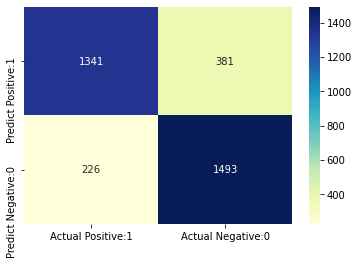

In [17]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1722
           1       0.80      0.87      0.83      1719

    accuracy                           0.82      3441
   macro avg       0.83      0.82      0.82      3441
weighted avg       0.83      0.82      0.82      3441



In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# grid_params = {'learning_rate': [0.01,0.001], 'n_estimators': [8, 24],
#                    'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 
#                    'objective': ['classification'], 'seed': [500],
#                    'colsample_bytree': [0.65, 0.75, 0.8], 
#                    'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
#                    'reg_lambda': [1, 2, 6],'num_iterations':[10,50,100]}
gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X=X_train, y=y_train)

param_grid = {
    'num_leaves': [15, 31],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [1],        
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc',early_stopping_round=50)

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=X_train, y=y_train,eval_set = (X_test, y_test))

print(lgb_model.best_params_, lgb_model.best_score_)
# grid = GridSearchCV(lgb.LGBMClassifier(), grid_params, scoring='r2', cv=5)
# grid.fit(X_train, y_train)
# lgbm_tuned = grid.best_estimator_

[1]	valid_0's auc: 0.540975
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.540975
[3]	valid_0's auc: 0.540975
[4]	valid_0's auc: 0.547647
[5]	valid_0's auc: 0.547972
[6]	valid_0's auc: 0.548001
[7]	valid_0's auc: 0.550722
[8]	valid_0's auc: 0.551276
[9]	valid_0's auc: 0.548487
[10]	valid_0's auc: 0.554843
[11]	valid_0's auc: 0.554851
[12]	valid_0's auc: 0.556407
[13]	valid_0's auc: 0.557542
[14]	valid_0's auc: 0.558804
[15]	valid_0's auc: 0.559134
[16]	valid_0's auc: 0.559378
[17]	valid_0's auc: 0.560581
[18]	valid_0's auc: 0.601186
[19]	valid_0's auc: 0.601132
[20]	valid_0's auc: 0.601534
[21]	valid_0's auc: 0.601646
[22]	valid_0's auc: 0.601652
[23]	valid_0's auc: 0.60115
[24]	valid_0's auc: 0.605535
[25]	valid_0's auc: 0.605458
[26]	valid_0's auc: 0.605131
[27]	valid_0's auc: 0.605314
[28]	valid_0's auc: 0.60498
[29]	valid_0's auc: 0.605208
[30]	valid_0's auc: 0.606556
[31]	valid_0's auc: 0.606798
[32]	valid_0's auc: 0.605538
[33]	valid_0's auc: 0.

[420]	valid_0's auc: 0.814715
[421]	valid_0's auc: 0.814781
[422]	valid_0's auc: 0.815271
[423]	valid_0's auc: 0.815271
[424]	valid_0's auc: 0.81582
[425]	valid_0's auc: 0.816038
[426]	valid_0's auc: 0.816348
[427]	valid_0's auc: 0.816334
[428]	valid_0's auc: 0.81647
[429]	valid_0's auc: 0.816175
[430]	valid_0's auc: 0.81629
[431]	valid_0's auc: 0.816172
[432]	valid_0's auc: 0.816196
[433]	valid_0's auc: 0.816456
[434]	valid_0's auc: 0.816445
[435]	valid_0's auc: 0.816574
[436]	valid_0's auc: 0.816288
[437]	valid_0's auc: 0.81629
[438]	valid_0's auc: 0.816305
[439]	valid_0's auc: 0.816481
[440]	valid_0's auc: 0.816424
[441]	valid_0's auc: 0.815965
[442]	valid_0's auc: 0.815922
[443]	valid_0's auc: 0.816164
[444]	valid_0's auc: 0.817216
[445]	valid_0's auc: 0.817202
[446]	valid_0's auc: 0.817621
[447]	valid_0's auc: 0.817655
[448]	valid_0's auc: 0.81783
[449]	valid_0's auc: 0.817482
[450]	valid_0's auc: 0.81748
[451]	valid_0's auc: 0.81751
[452]	valid_0's auc: 0.817466
[453]	valid_0's a

[787]	valid_0's auc: 0.845973
[788]	valid_0's auc: 0.846087
[789]	valid_0's auc: 0.846146
[790]	valid_0's auc: 0.846276
[791]	valid_0's auc: 0.846101
[792]	valid_0's auc: 0.846092
[793]	valid_0's auc: 0.846053
[794]	valid_0's auc: 0.846053
[795]	valid_0's auc: 0.84633
[796]	valid_0's auc: 0.846358
[797]	valid_0's auc: 0.846369
[798]	valid_0's auc: 0.846412
[799]	valid_0's auc: 0.846291
[800]	valid_0's auc: 0.846349
[801]	valid_0's auc: 0.846614
[802]	valid_0's auc: 0.846722
[803]	valid_0's auc: 0.846696
[804]	valid_0's auc: 0.84666
[805]	valid_0's auc: 0.846875
[806]	valid_0's auc: 0.846955
[807]	valid_0's auc: 0.846946
[808]	valid_0's auc: 0.847008
[809]	valid_0's auc: 0.847129
[810]	valid_0's auc: 0.847162
[811]	valid_0's auc: 0.847216
[812]	valid_0's auc: 0.847187
[813]	valid_0's auc: 0.847252
[814]	valid_0's auc: 0.847244
[815]	valid_0's auc: 0.847189
[816]	valid_0's auc: 0.847207
[817]	valid_0's auc: 0.847327
[818]	valid_0's auc: 0.847351
[819]	valid_0's auc: 0.848099
[820]	valid_

[1096]	valid_0's auc: 0.869094
[1097]	valid_0's auc: 0.86909
[1098]	valid_0's auc: 0.869102
[1099]	valid_0's auc: 0.869108
[1100]	valid_0's auc: 0.869132
[1101]	valid_0's auc: 0.86914
[1102]	valid_0's auc: 0.86924
[1103]	valid_0's auc: 0.869248
[1104]	valid_0's auc: 0.869238
[1105]	valid_0's auc: 0.869256
[1106]	valid_0's auc: 0.869266
[1107]	valid_0's auc: 0.869296
[1108]	valid_0's auc: 0.869373
[1109]	valid_0's auc: 0.86941
[1110]	valid_0's auc: 0.869352
[1111]	valid_0's auc: 0.869442
[1112]	valid_0's auc: 0.86946
[1113]	valid_0's auc: 0.869521
[1114]	valid_0's auc: 0.869565
[1115]	valid_0's auc: 0.869926
[1116]	valid_0's auc: 0.869938
[1117]	valid_0's auc: 0.869945
[1118]	valid_0's auc: 0.869967
[1119]	valid_0's auc: 0.869998
[1120]	valid_0's auc: 0.870001
[1121]	valid_0's auc: 0.869996
[1122]	valid_0's auc: 0.870008
[1123]	valid_0's auc: 0.870012
[1124]	valid_0's auc: 0.870024
[1125]	valid_0's auc: 0.869979
[1126]	valid_0's auc: 0.870062
[1127]	valid_0's auc: 0.870066
[1128]	valid_

[1488]	valid_0's auc: 0.883026
[1489]	valid_0's auc: 0.883072
[1490]	valid_0's auc: 0.883066
[1491]	valid_0's auc: 0.883085
[1492]	valid_0's auc: 0.883081
[1493]	valid_0's auc: 0.883121
[1494]	valid_0's auc: 0.883236
[1495]	valid_0's auc: 0.883758
[1496]	valid_0's auc: 0.883881
[1497]	valid_0's auc: 0.883845
[1498]	valid_0's auc: 0.88386
[1499]	valid_0's auc: 0.883858
[1500]	valid_0's auc: 0.883898
[1501]	valid_0's auc: 0.8839
[1502]	valid_0's auc: 0.883987
[1503]	valid_0's auc: 0.883895
[1504]	valid_0's auc: 0.8839
[1505]	valid_0's auc: 0.884047
[1506]	valid_0's auc: 0.884047
[1507]	valid_0's auc: 0.884048
[1508]	valid_0's auc: 0.88408
[1509]	valid_0's auc: 0.884094
[1510]	valid_0's auc: 0.884173
[1511]	valid_0's auc: 0.884174
[1512]	valid_0's auc: 0.884202
[1513]	valid_0's auc: 0.884247
[1514]	valid_0's auc: 0.884282
[1515]	valid_0's auc: 0.884232
[1516]	valid_0's auc: 0.884231
[1517]	valid_0's auc: 0.884066
[1518]	valid_0's auc: 0.884066
[1519]	valid_0's auc: 0.88408
[1520]	valid_0'

[1918]	valid_0's auc: 0.891081
[1919]	valid_0's auc: 0.891299
[1920]	valid_0's auc: 0.89125
[1921]	valid_0's auc: 0.891249
[1922]	valid_0's auc: 0.891271
[1923]	valid_0's auc: 0.891271
[1924]	valid_0's auc: 0.891372
[1925]	valid_0's auc: 0.891372
[1926]	valid_0's auc: 0.891391
[1927]	valid_0's auc: 0.891463
[1928]	valid_0's auc: 0.891465
[1929]	valid_0's auc: 0.891479
[1930]	valid_0's auc: 0.891498
[1931]	valid_0's auc: 0.891507
[1932]	valid_0's auc: 0.891735
[1933]	valid_0's auc: 0.891736
[1934]	valid_0's auc: 0.891832
[1935]	valid_0's auc: 0.891763
[1936]	valid_0's auc: 0.891798
[1937]	valid_0's auc: 0.891761
[1938]	valid_0's auc: 0.89177
[1939]	valid_0's auc: 0.891772
[1940]	valid_0's auc: 0.891804
[1941]	valid_0's auc: 0.891808
[1942]	valid_0's auc: 0.892002
[1943]	valid_0's auc: 0.891765
[1944]	valid_0's auc: 0.891884
[1945]	valid_0's auc: 0.891884
[1946]	valid_0's auc: 0.891787
[1947]	valid_0's auc: 0.891811
[1948]	valid_0's auc: 0.891815
[1949]	valid_0's auc: 0.891954
[1950]	val

[223]	valid_0's auc: 0.807613
[224]	valid_0's auc: 0.80769
[225]	valid_0's auc: 0.807837
[226]	valid_0's auc: 0.807924
[227]	valid_0's auc: 0.80824
[228]	valid_0's auc: 0.808423
[229]	valid_0's auc: 0.808397
[230]	valid_0's auc: 0.809046
[231]	valid_0's auc: 0.81178
[232]	valid_0's auc: 0.811861
[233]	valid_0's auc: 0.812247
[234]	valid_0's auc: 0.812224
[235]	valid_0's auc: 0.812217
[236]	valid_0's auc: 0.812196
[237]	valid_0's auc: 0.81298
[238]	valid_0's auc: 0.815498
[239]	valid_0's auc: 0.815545
[240]	valid_0's auc: 0.815713
[241]	valid_0's auc: 0.816035
[242]	valid_0's auc: 0.817821
[243]	valid_0's auc: 0.817268
[244]	valid_0's auc: 0.817204
[245]	valid_0's auc: 0.817253
[246]	valid_0's auc: 0.817305
[247]	valid_0's auc: 0.817251
[248]	valid_0's auc: 0.817366
[249]	valid_0's auc: 0.817075
[250]	valid_0's auc: 0.817103
[251]	valid_0's auc: 0.819364
[252]	valid_0's auc: 0.819533
[253]	valid_0's auc: 0.819494
[254]	valid_0's auc: 0.821886
[255]	valid_0's auc: 0.821935
[256]	valid_0'

[626]	valid_0's auc: 0.87242
[627]	valid_0's auc: 0.872421
[628]	valid_0's auc: 0.872388
[629]	valid_0's auc: 0.872399
[630]	valid_0's auc: 0.872491
[631]	valid_0's auc: 0.872451
[632]	valid_0's auc: 0.872405
[633]	valid_0's auc: 0.872504
[634]	valid_0's auc: 0.87261
[635]	valid_0's auc: 0.872602
[636]	valid_0's auc: 0.872877
[637]	valid_0's auc: 0.872957
[638]	valid_0's auc: 0.872964
[639]	valid_0's auc: 0.873246
[640]	valid_0's auc: 0.873419
[641]	valid_0's auc: 0.873488
[642]	valid_0's auc: 0.873501
[643]	valid_0's auc: 0.873614
[644]	valid_0's auc: 0.873624
[645]	valid_0's auc: 0.873683
[646]	valid_0's auc: 0.873665
[647]	valid_0's auc: 0.873598
[648]	valid_0's auc: 0.873436
[649]	valid_0's auc: 0.873592
[650]	valid_0's auc: 0.873607
[651]	valid_0's auc: 0.873789
[652]	valid_0's auc: 0.87388
[653]	valid_0's auc: 0.873924
[654]	valid_0's auc: 0.874151
[655]	valid_0's auc: 0.874193
[656]	valid_0's auc: 0.874179
[657]	valid_0's auc: 0.87418
[658]	valid_0's auc: 0.874178
[659]	valid_0'

[1063]	valid_0's auc: 0.894094
[1064]	valid_0's auc: 0.894172
[1065]	valid_0's auc: 0.89451
[1066]	valid_0's auc: 0.894518
[1067]	valid_0's auc: 0.894533
[1068]	valid_0's auc: 0.894524
[1069]	valid_0's auc: 0.8946
[1070]	valid_0's auc: 0.894582
[1071]	valid_0's auc: 0.894423
[1072]	valid_0's auc: 0.894427
[1073]	valid_0's auc: 0.89439
[1074]	valid_0's auc: 0.894378
[1075]	valid_0's auc: 0.894395
[1076]	valid_0's auc: 0.894393
[1077]	valid_0's auc: 0.894365
[1078]	valid_0's auc: 0.894382
[1079]	valid_0's auc: 0.894401
[1080]	valid_0's auc: 0.894377
[1081]	valid_0's auc: 0.89446
[1082]	valid_0's auc: 0.894513
[1083]	valid_0's auc: 0.8945
[1084]	valid_0's auc: 0.894622
[1085]	valid_0's auc: 0.894666
[1086]	valid_0's auc: 0.894709
[1087]	valid_0's auc: 0.89468
[1088]	valid_0's auc: 0.894586
[1089]	valid_0's auc: 0.894517
[1090]	valid_0's auc: 0.894522
[1091]	valid_0's auc: 0.894529
[1092]	valid_0's auc: 0.894593
[1093]	valid_0's auc: 0.894583
[1094]	valid_0's auc: 0.894584
[1095]	valid_0's

[1517]	valid_0's auc: 0.910228
[1518]	valid_0's auc: 0.910228
[1519]	valid_0's auc: 0.910379
[1520]	valid_0's auc: 0.910395
[1521]	valid_0's auc: 0.910446
[1522]	valid_0's auc: 0.910452
[1523]	valid_0's auc: 0.910463
[1524]	valid_0's auc: 0.910456
[1525]	valid_0's auc: 0.910543
[1526]	valid_0's auc: 0.91056
[1527]	valid_0's auc: 0.910562
[1528]	valid_0's auc: 0.910552
[1529]	valid_0's auc: 0.910585
[1530]	valid_0's auc: 0.910582
[1531]	valid_0's auc: 0.910585
[1532]	valid_0's auc: 0.910548
[1533]	valid_0's auc: 0.91055
[1534]	valid_0's auc: 0.910548
[1535]	valid_0's auc: 0.910545
[1536]	valid_0's auc: 0.91058
[1537]	valid_0's auc: 0.910664
[1538]	valid_0's auc: 0.910683
[1539]	valid_0's auc: 0.910683
[1540]	valid_0's auc: 0.910679
[1541]	valid_0's auc: 0.910673
[1542]	valid_0's auc: 0.910758
[1543]	valid_0's auc: 0.910791
[1544]	valid_0's auc: 0.910814
[1545]	valid_0's auc: 0.910977
[1546]	valid_0's auc: 0.91097
[1547]	valid_0's auc: 0.91097
[1548]	valid_0's auc: 0.910976
[1549]	valid_

[1914]	valid_0's auc: 0.916448
[1915]	valid_0's auc: 0.916444
[1916]	valid_0's auc: 0.916446
[1917]	valid_0's auc: 0.916478
[1918]	valid_0's auc: 0.916532
[1919]	valid_0's auc: 0.916531
[1920]	valid_0's auc: 0.916552
[1921]	valid_0's auc: 0.916562
[1922]	valid_0's auc: 0.916579
[1923]	valid_0's auc: 0.916604
[1924]	valid_0's auc: 0.916639
[1925]	valid_0's auc: 0.91664
[1926]	valid_0's auc: 0.916643
[1927]	valid_0's auc: 0.916671
[1928]	valid_0's auc: 0.916694
[1929]	valid_0's auc: 0.916682
[1930]	valid_0's auc: 0.916689
[1931]	valid_0's auc: 0.916638
[1932]	valid_0's auc: 0.916648
[1933]	valid_0's auc: 0.916652
[1934]	valid_0's auc: 0.916651
[1935]	valid_0's auc: 0.916676
[1936]	valid_0's auc: 0.916711
[1937]	valid_0's auc: 0.916724
[1938]	valid_0's auc: 0.916725
[1939]	valid_0's auc: 0.916726
[1940]	valid_0's auc: 0.91673
[1941]	valid_0's auc: 0.91669
[1942]	valid_0's auc: 0.916737
[1943]	valid_0's auc: 0.916773
[1944]	valid_0's auc: 0.916751
[1945]	valid_0's auc: 0.916758
[1946]	vali

[233]	valid_0's auc: 0.815081
[234]	valid_0's auc: 0.814927
[235]	valid_0's auc: 0.81511
[236]	valid_0's auc: 0.814596
[237]	valid_0's auc: 0.814697
[238]	valid_0's auc: 0.814844
[239]	valid_0's auc: 0.815073
[240]	valid_0's auc: 0.8151
[241]	valid_0's auc: 0.815332
[242]	valid_0's auc: 0.815349
[243]	valid_0's auc: 0.815345
[244]	valid_0's auc: 0.815934
[245]	valid_0's auc: 0.816228
[246]	valid_0's auc: 0.816191
[247]	valid_0's auc: 0.816397
[248]	valid_0's auc: 0.819464
[249]	valid_0's auc: 0.819613
[250]	valid_0's auc: 0.819659
[251]	valid_0's auc: 0.819632
[252]	valid_0's auc: 0.8196
[253]	valid_0's auc: 0.819484
[254]	valid_0's auc: 0.819484
[255]	valid_0's auc: 0.819452
[256]	valid_0's auc: 0.81945
[257]	valid_0's auc: 0.819057
[258]	valid_0's auc: 0.819303
[259]	valid_0's auc: 0.819468
[260]	valid_0's auc: 0.819608
[261]	valid_0's auc: 0.819753
[262]	valid_0's auc: 0.819691
[263]	valid_0's auc: 0.820371
[264]	valid_0's auc: 0.819499
[265]	valid_0's auc: 0.819564
[266]	valid_0's 

[676]	valid_0's auc: 0.859799
[677]	valid_0's auc: 0.859873
[678]	valid_0's auc: 0.859909
[679]	valid_0's auc: 0.859893
[680]	valid_0's auc: 0.860122
[681]	valid_0's auc: 0.860184
[682]	valid_0's auc: 0.860273
[683]	valid_0's auc: 0.860461
[684]	valid_0's auc: 0.860634
[685]	valid_0's auc: 0.860624
[686]	valid_0's auc: 0.860622
[687]	valid_0's auc: 0.860672
[688]	valid_0's auc: 0.860596
[689]	valid_0's auc: 0.860897
[690]	valid_0's auc: 0.861
[691]	valid_0's auc: 0.861018
[692]	valid_0's auc: 0.860903
[693]	valid_0's auc: 0.860886
[694]	valid_0's auc: 0.861121
[695]	valid_0's auc: 0.861176
[696]	valid_0's auc: 0.860961
[697]	valid_0's auc: 0.860956
[698]	valid_0's auc: 0.860929
[699]	valid_0's auc: 0.861042
[700]	valid_0's auc: 0.861116
[701]	valid_0's auc: 0.861027
[702]	valid_0's auc: 0.861022
[703]	valid_0's auc: 0.861013
[704]	valid_0's auc: 0.861025
[705]	valid_0's auc: 0.860991
[706]	valid_0's auc: 0.860985
[707]	valid_0's auc: 0.861121
[708]	valid_0's auc: 0.861205
[709]	valid_0

[1102]	valid_0's auc: 0.881879
[1103]	valid_0's auc: 0.881867
[1104]	valid_0's auc: 0.881868
[1105]	valid_0's auc: 0.881944
[1106]	valid_0's auc: 0.881961
[1107]	valid_0's auc: 0.881978
[1108]	valid_0's auc: 0.881985
[1109]	valid_0's auc: 0.881795
[1110]	valid_0's auc: 0.881934
[1111]	valid_0's auc: 0.88216
[1112]	valid_0's auc: 0.882209
[1113]	valid_0's auc: 0.88216
[1114]	valid_0's auc: 0.882154
[1115]	valid_0's auc: 0.882267
[1116]	valid_0's auc: 0.88226
[1117]	valid_0's auc: 0.882274
[1118]	valid_0's auc: 0.882278
[1119]	valid_0's auc: 0.882296
[1120]	valid_0's auc: 0.882364
[1121]	valid_0's auc: 0.882377
[1122]	valid_0's auc: 0.882357
[1123]	valid_0's auc: 0.882405
[1124]	valid_0's auc: 0.882411
[1125]	valid_0's auc: 0.882411
[1126]	valid_0's auc: 0.88274
[1127]	valid_0's auc: 0.882816
[1128]	valid_0's auc: 0.88283
[1129]	valid_0's auc: 0.882839
[1130]	valid_0's auc: 0.88284
[1131]	valid_0's auc: 0.882939
[1132]	valid_0's auc: 0.882986
[1133]	valid_0's auc: 0.882999
[1134]	valid_0

[1544]	valid_0's auc: 0.895688
[1545]	valid_0's auc: 0.895799
[1546]	valid_0's auc: 0.89577
[1547]	valid_0's auc: 0.895779
[1548]	valid_0's auc: 0.895795
[1549]	valid_0's auc: 0.895854
[1550]	valid_0's auc: 0.895884
[1551]	valid_0's auc: 0.895879
[1552]	valid_0's auc: 0.895907
[1553]	valid_0's auc: 0.895906
[1554]	valid_0's auc: 0.895949
[1555]	valid_0's auc: 0.896039
[1556]	valid_0's auc: 0.896198
[1557]	valid_0's auc: 0.896199
[1558]	valid_0's auc: 0.896236
[1559]	valid_0's auc: 0.896239
[1560]	valid_0's auc: 0.896236
[1561]	valid_0's auc: 0.896305
[1562]	valid_0's auc: 0.896287
[1563]	valid_0's auc: 0.896264
[1564]	valid_0's auc: 0.896346
[1565]	valid_0's auc: 0.89635
[1566]	valid_0's auc: 0.896388
[1567]	valid_0's auc: 0.896444
[1568]	valid_0's auc: 0.896356
[1569]	valid_0's auc: 0.896347
[1570]	valid_0's auc: 0.896357
[1571]	valid_0's auc: 0.896336
[1572]	valid_0's auc: 0.896283
[1573]	valid_0's auc: 0.896271
[1574]	valid_0's auc: 0.896297
[1575]	valid_0's auc: 0.896336
[1576]	val

[1922]	valid_0's auc: 0.903061
[1923]	valid_0's auc: 0.903085
[1924]	valid_0's auc: 0.903079
[1925]	valid_0's auc: 0.903022
[1926]	valid_0's auc: 0.903022
[1927]	valid_0's auc: 0.903049
[1928]	valid_0's auc: 0.903036
[1929]	valid_0's auc: 0.90301
[1930]	valid_0's auc: 0.903002
[1931]	valid_0's auc: 0.903004
[1932]	valid_0's auc: 0.90305
[1933]	valid_0's auc: 0.903067
[1934]	valid_0's auc: 0.90307
[1935]	valid_0's auc: 0.903062
[1936]	valid_0's auc: 0.903213
[1937]	valid_0's auc: 0.903216
[1938]	valid_0's auc: 0.903202
[1939]	valid_0's auc: 0.903244
[1940]	valid_0's auc: 0.903264
[1941]	valid_0's auc: 0.903386
[1942]	valid_0's auc: 0.903392
[1943]	valid_0's auc: 0.903429
[1944]	valid_0's auc: 0.903433
[1945]	valid_0's auc: 0.903359
[1946]	valid_0's auc: 0.903359
[1947]	valid_0's auc: 0.903408
[1948]	valid_0's auc: 0.903446
[1949]	valid_0's auc: 0.903437
[1950]	valid_0's auc: 0.903756
[1951]	valid_0's auc: 0.903753
[1952]	valid_0's auc: 0.90378
[1953]	valid_0's auc: 0.903793
[1954]	valid

[330]	valid_0's auc: 0.823057
[331]	valid_0's auc: 0.82309
[332]	valid_0's auc: 0.822655
[333]	valid_0's auc: 0.822628
[334]	valid_0's auc: 0.822622
[335]	valid_0's auc: 0.822725
[336]	valid_0's auc: 0.822728
[337]	valid_0's auc: 0.822816
[338]	valid_0's auc: 0.823378
[339]	valid_0's auc: 0.823401
[340]	valid_0's auc: 0.823516
[341]	valid_0's auc: 0.823485
[342]	valid_0's auc: 0.823469
[343]	valid_0's auc: 0.823625
[344]	valid_0's auc: 0.823386
[345]	valid_0's auc: 0.82339
[346]	valid_0's auc: 0.823635
[347]	valid_0's auc: 0.823683
[348]	valid_0's auc: 0.823718
[349]	valid_0's auc: 0.823741
[350]	valid_0's auc: 0.824206
[351]	valid_0's auc: 0.824206
[352]	valid_0's auc: 0.823997
[353]	valid_0's auc: 0.823998
[354]	valid_0's auc: 0.823987
[355]	valid_0's auc: 0.823981
[356]	valid_0's auc: 0.824093
[357]	valid_0's auc: 0.824116
[358]	valid_0's auc: 0.82406
[359]	valid_0's auc: 0.824425
[360]	valid_0's auc: 0.825339
[361]	valid_0's auc: 0.825318
[362]	valid_0's auc: 0.825416
[363]	valid_0

[712]	valid_0's auc: 0.867608
[713]	valid_0's auc: 0.867617
[714]	valid_0's auc: 0.867573
[715]	valid_0's auc: 0.867541
[716]	valid_0's auc: 0.867803
[717]	valid_0's auc: 0.868229
[718]	valid_0's auc: 0.868229
[719]	valid_0's auc: 0.868239
[720]	valid_0's auc: 0.868275
[721]	valid_0's auc: 0.868346
[722]	valid_0's auc: 0.868318
[723]	valid_0's auc: 0.868317
[724]	valid_0's auc: 0.868392
[725]	valid_0's auc: 0.868615
[726]	valid_0's auc: 0.868617
[727]	valid_0's auc: 0.868735
[728]	valid_0's auc: 0.868745
[729]	valid_0's auc: 0.86901
[730]	valid_0's auc: 0.869156
[731]	valid_0's auc: 0.869302
[732]	valid_0's auc: 0.869351
[733]	valid_0's auc: 0.869384
[734]	valid_0's auc: 0.869455
[735]	valid_0's auc: 0.869402
[736]	valid_0's auc: 0.869458
[737]	valid_0's auc: 0.869759
[738]	valid_0's auc: 0.869808
[739]	valid_0's auc: 0.869819
[740]	valid_0's auc: 0.869804
[741]	valid_0's auc: 0.869824
[742]	valid_0's auc: 0.869807
[743]	valid_0's auc: 0.869807
[744]	valid_0's auc: 0.869861
[745]	valid

[1124]	valid_0's auc: 0.890011
[1125]	valid_0's auc: 0.890017
[1126]	valid_0's auc: 0.89001
[1127]	valid_0's auc: 0.890019
[1128]	valid_0's auc: 0.890055
[1129]	valid_0's auc: 0.890139
[1130]	valid_0's auc: 0.890066
[1131]	valid_0's auc: 0.890219
[1132]	valid_0's auc: 0.890336
[1133]	valid_0's auc: 0.890317
[1134]	valid_0's auc: 0.890494
[1135]	valid_0's auc: 0.890536
[1136]	valid_0's auc: 0.890528
[1137]	valid_0's auc: 0.890572
[1138]	valid_0's auc: 0.890546
[1139]	valid_0's auc: 0.890624
[1140]	valid_0's auc: 0.890631
[1141]	valid_0's auc: 0.890865
[1142]	valid_0's auc: 0.890895
[1143]	valid_0's auc: 0.890965
[1144]	valid_0's auc: 0.890964
[1145]	valid_0's auc: 0.890969
[1146]	valid_0's auc: 0.891086
[1147]	valid_0's auc: 0.891101
[1148]	valid_0's auc: 0.891099
[1149]	valid_0's auc: 0.891102
[1150]	valid_0's auc: 0.891128
[1151]	valid_0's auc: 0.891125
[1152]	valid_0's auc: 0.891161
[1153]	valid_0's auc: 0.891179
[1154]	valid_0's auc: 0.891216
[1155]	valid_0's auc: 0.891251
[1156]	va

[1560]	valid_0's auc: 0.900863
[1561]	valid_0's auc: 0.900862
[1562]	valid_0's auc: 0.901096
[1563]	valid_0's auc: 0.901093
[1564]	valid_0's auc: 0.901315
[1565]	valid_0's auc: 0.901293
[1566]	valid_0's auc: 0.901324
[1567]	valid_0's auc: 0.901319
[1568]	valid_0's auc: 0.901326
[1569]	valid_0's auc: 0.901418
[1570]	valid_0's auc: 0.901423
[1571]	valid_0's auc: 0.901378
[1572]	valid_0's auc: 0.901413
[1573]	valid_0's auc: 0.901439
[1574]	valid_0's auc: 0.901436
[1575]	valid_0's auc: 0.901456
[1576]	valid_0's auc: 0.901411
[1577]	valid_0's auc: 0.901429
[1578]	valid_0's auc: 0.901486
[1579]	valid_0's auc: 0.901521
[1580]	valid_0's auc: 0.90149
[1581]	valid_0's auc: 0.901563
[1582]	valid_0's auc: 0.901565
[1583]	valid_0's auc: 0.901577
[1584]	valid_0's auc: 0.901614
[1585]	valid_0's auc: 0.901637
[1586]	valid_0's auc: 0.901679
[1587]	valid_0's auc: 0.901679
[1588]	valid_0's auc: 0.90169
[1589]	valid_0's auc: 0.901698
[1590]	valid_0's auc: 0.90182
[1591]	valid_0's auc: 0.901849
[1592]	vali

[1995]	valid_0's auc: 0.907706
[1996]	valid_0's auc: 0.907711
[1997]	valid_0's auc: 0.907684
[1998]	valid_0's auc: 0.907706
[1999]	valid_0's auc: 0.907682
[2000]	valid_0's auc: 0.907745
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.907745
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[1]	valid_0's auc: 0.533104
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.550894
[3]	valid_0's auc: 0.550077
[4]	valid_0's auc: 0.556023
[5]	valid_0's auc: 0.551725
[6]	valid_0's auc: 0.556012
[7]	valid_0's auc: 0.603128
[8]	valid_0's auc: 0.603578
[9]	valid_0's auc: 0.603532
[10]	valid_0's auc: 0.61312
[11]	valid_0's auc: 0.613134
[12]	valid_0's auc: 0.613713
[13]	valid_0's auc: 0.615947
[14]	valid_0's auc: 0.61676
[15]	valid_0's auc: 0.616414
[16]	val

[456]	valid_0's auc: 0.854837
[457]	valid_0's auc: 0.854759
[458]	valid_0's auc: 0.85484
[459]	valid_0's auc: 0.855128
[460]	valid_0's auc: 0.855262
[461]	valid_0's auc: 0.855377
[462]	valid_0's auc: 0.855382
[463]	valid_0's auc: 0.855462
[464]	valid_0's auc: 0.855564
[465]	valid_0's auc: 0.855792
[466]	valid_0's auc: 0.85593
[467]	valid_0's auc: 0.855947
[468]	valid_0's auc: 0.855776
[469]	valid_0's auc: 0.855826
[470]	valid_0's auc: 0.856246
[471]	valid_0's auc: 0.856278
[472]	valid_0's auc: 0.856369
[473]	valid_0's auc: 0.856382
[474]	valid_0's auc: 0.856371
[475]	valid_0's auc: 0.856538
[476]	valid_0's auc: 0.857014
[477]	valid_0's auc: 0.857139
[478]	valid_0's auc: 0.856923
[479]	valid_0's auc: 0.856973
[480]	valid_0's auc: 0.857274
[481]	valid_0's auc: 0.857618
[482]	valid_0's auc: 0.857596
[483]	valid_0's auc: 0.857615
[484]	valid_0's auc: 0.85783
[485]	valid_0's auc: 0.857793
[486]	valid_0's auc: 0.857984
[487]	valid_0's auc: 0.858234
[488]	valid_0's auc: 0.858506
[489]	valid_0

[908]	valid_0's auc: 0.885452
[909]	valid_0's auc: 0.885452
[910]	valid_0's auc: 0.88546
[911]	valid_0's auc: 0.885494
[912]	valid_0's auc: 0.885543
[913]	valid_0's auc: 0.885566
[914]	valid_0's auc: 0.885561
[915]	valid_0's auc: 0.885556
[916]	valid_0's auc: 0.885676
[917]	valid_0's auc: 0.885628
[918]	valid_0's auc: 0.885722
[919]	valid_0's auc: 0.885736
[920]	valid_0's auc: 0.88579
[921]	valid_0's auc: 0.885958
[922]	valid_0's auc: 0.885959
[923]	valid_0's auc: 0.886007
[924]	valid_0's auc: 0.88602
[925]	valid_0's auc: 0.885957
[926]	valid_0's auc: 0.886083
[927]	valid_0's auc: 0.886205
[928]	valid_0's auc: 0.886194
[929]	valid_0's auc: 0.886218
[930]	valid_0's auc: 0.886254
[931]	valid_0's auc: 0.886301
[932]	valid_0's auc: 0.886323
[933]	valid_0's auc: 0.8865
[934]	valid_0's auc: 0.886504
[935]	valid_0's auc: 0.886595
[936]	valid_0's auc: 0.886595
[937]	valid_0's auc: 0.886633
[938]	valid_0's auc: 0.886704
[939]	valid_0's auc: 0.886729
[940]	valid_0's auc: 0.886667
[941]	valid_0's

[1318]	valid_0's auc: 0.897222
[1319]	valid_0's auc: 0.897222
[1320]	valid_0's auc: 0.897201
[1321]	valid_0's auc: 0.897228
[1322]	valid_0's auc: 0.897235
[1323]	valid_0's auc: 0.897157
[1324]	valid_0's auc: 0.897143
[1325]	valid_0's auc: 0.897078
[1326]	valid_0's auc: 0.897102
[1327]	valid_0's auc: 0.897102
[1328]	valid_0's auc: 0.897125
[1329]	valid_0's auc: 0.897108
[1330]	valid_0's auc: 0.897111
[1331]	valid_0's auc: 0.897182
[1332]	valid_0's auc: 0.897156
[1333]	valid_0's auc: 0.897152
[1334]	valid_0's auc: 0.897212
[1335]	valid_0's auc: 0.897205
[1336]	valid_0's auc: 0.897123
[1337]	valid_0's auc: 0.897162
[1338]	valid_0's auc: 0.89718
[1339]	valid_0's auc: 0.89718
[1340]	valid_0's auc: 0.897184
[1341]	valid_0's auc: 0.897196
[1342]	valid_0's auc: 0.897204
[1343]	valid_0's auc: 0.897178
[1344]	valid_0's auc: 0.89716
[1345]	valid_0's auc: 0.897146
[1346]	valid_0's auc: 0.897146
[1347]	valid_0's auc: 0.897213
[1348]	valid_0's auc: 0.897146
[1349]	valid_0's auc: 0.897178
[1350]	vali

[1774]	valid_0's auc: 0.905025
[1775]	valid_0's auc: 0.905031
[1776]	valid_0's auc: 0.90504
[1777]	valid_0's auc: 0.905043
[1778]	valid_0's auc: 0.905029
[1779]	valid_0's auc: 0.905085
[1780]	valid_0's auc: 0.905106
[1781]	valid_0's auc: 0.905098
[1782]	valid_0's auc: 0.905111
[1783]	valid_0's auc: 0.905317
[1784]	valid_0's auc: 0.905323
[1785]	valid_0's auc: 0.90535
[1786]	valid_0's auc: 0.905351
[1787]	valid_0's auc: 0.905352
[1788]	valid_0's auc: 0.905363
[1789]	valid_0's auc: 0.905362
[1790]	valid_0's auc: 0.905362
[1791]	valid_0's auc: 0.905365
[1792]	valid_0's auc: 0.905403
[1793]	valid_0's auc: 0.905429
[1794]	valid_0's auc: 0.905395
[1795]	valid_0's auc: 0.905453
[1796]	valid_0's auc: 0.905459
[1797]	valid_0's auc: 0.905486
[1798]	valid_0's auc: 0.905459
[1799]	valid_0's auc: 0.90545
[1800]	valid_0's auc: 0.905528
[1801]	valid_0's auc: 0.905591
[1802]	valid_0's auc: 0.905582
[1803]	valid_0's auc: 0.905585
[1804]	valid_0's auc: 0.905586
[1805]	valid_0's auc: 0.905581
[1806]	vali

[172]	valid_0's auc: 0.757744
[173]	valid_0's auc: 0.758051
[174]	valid_0's auc: 0.76053
[175]	valid_0's auc: 0.759975
[176]	valid_0's auc: 0.759923
[177]	valid_0's auc: 0.759332
[178]	valid_0's auc: 0.759176
[179]	valid_0's auc: 0.760169
[180]	valid_0's auc: 0.761734
[181]	valid_0's auc: 0.761835
[182]	valid_0's auc: 0.761926
[183]	valid_0's auc: 0.76196
[184]	valid_0's auc: 0.764225
[185]	valid_0's auc: 0.763861
[186]	valid_0's auc: 0.764334
[187]	valid_0's auc: 0.765082
[188]	valid_0's auc: 0.76541
[189]	valid_0's auc: 0.766131
[190]	valid_0's auc: 0.76718
[191]	valid_0's auc: 0.767568
[192]	valid_0's auc: 0.76704
[193]	valid_0's auc: 0.767737
[194]	valid_0's auc: 0.768515
[195]	valid_0's auc: 0.769587
[196]	valid_0's auc: 0.769965
[197]	valid_0's auc: 0.768865
[198]	valid_0's auc: 0.769292
[199]	valid_0's auc: 0.769331
[200]	valid_0's auc: 0.769664
[201]	valid_0's auc: 0.770728
[202]	valid_0's auc: 0.771364
[203]	valid_0's auc: 0.771309
[204]	valid_0's auc: 0.771824
[205]	valid_0's

[515]	valid_0's auc: 0.816937
[516]	valid_0's auc: 0.816853
[517]	valid_0's auc: 0.81672
[518]	valid_0's auc: 0.816844
[519]	valid_0's auc: 0.816804
[520]	valid_0's auc: 0.81701
[521]	valid_0's auc: 0.816919
[522]	valid_0's auc: 0.816956
[523]	valid_0's auc: 0.817149
[524]	valid_0's auc: 0.817063
[525]	valid_0's auc: 0.817091
[526]	valid_0's auc: 0.817018
[527]	valid_0's auc: 0.817107
[528]	valid_0's auc: 0.817216
[529]	valid_0's auc: 0.817022
[530]	valid_0's auc: 0.817192
[531]	valid_0's auc: 0.817167
[532]	valid_0's auc: 0.817288
[533]	valid_0's auc: 0.817464
[534]	valid_0's auc: 0.817369
[535]	valid_0's auc: 0.817442
[536]	valid_0's auc: 0.817344
[537]	valid_0's auc: 0.817449
[538]	valid_0's auc: 0.817507
[539]	valid_0's auc: 0.817588
[540]	valid_0's auc: 0.818436
[541]	valid_0's auc: 0.818323
[542]	valid_0's auc: 0.818307
[543]	valid_0's auc: 0.818938
[544]	valid_0's auc: 0.818971
[545]	valid_0's auc: 0.819081
[546]	valid_0's auc: 0.819168
[547]	valid_0's auc: 0.819084
[548]	valid_

[862]	valid_0's auc: 0.851705
[863]	valid_0's auc: 0.851759
[864]	valid_0's auc: 0.851701
[865]	valid_0's auc: 0.851649
[866]	valid_0's auc: 0.851635
[867]	valid_0's auc: 0.851702
[868]	valid_0's auc: 0.851709
[869]	valid_0's auc: 0.851719
[870]	valid_0's auc: 0.852025
[871]	valid_0's auc: 0.852193
[872]	valid_0's auc: 0.852241
[873]	valid_0's auc: 0.852338
[874]	valid_0's auc: 0.852368
[875]	valid_0's auc: 0.852393
[876]	valid_0's auc: 0.85237
[877]	valid_0's auc: 0.852657
[878]	valid_0's auc: 0.852675
[879]	valid_0's auc: 0.853243
[880]	valid_0's auc: 0.853057
[881]	valid_0's auc: 0.853076
[882]	valid_0's auc: 0.853174
[883]	valid_0's auc: 0.853436
[884]	valid_0's auc: 0.853501
[885]	valid_0's auc: 0.853556
[886]	valid_0's auc: 0.854147
[887]	valid_0's auc: 0.854155
[888]	valid_0's auc: 0.854138
[889]	valid_0's auc: 0.854173
[890]	valid_0's auc: 0.85442
[891]	valid_0's auc: 0.854434
[892]	valid_0's auc: 0.854589
[893]	valid_0's auc: 0.854699
[894]	valid_0's auc: 0.854954
[895]	valid_

[1241]	valid_0's auc: 0.873998
[1242]	valid_0's auc: 0.873993
[1243]	valid_0's auc: 0.874132
[1244]	valid_0's auc: 0.874093
[1245]	valid_0's auc: 0.874105
[1246]	valid_0's auc: 0.87412
[1247]	valid_0's auc: 0.874267
[1248]	valid_0's auc: 0.874261
[1249]	valid_0's auc: 0.874315
[1250]	valid_0's auc: 0.87434
[1251]	valid_0's auc: 0.874346
[1252]	valid_0's auc: 0.87436
[1253]	valid_0's auc: 0.87438
[1254]	valid_0's auc: 0.874647
[1255]	valid_0's auc: 0.874651
[1256]	valid_0's auc: 0.874646
[1257]	valid_0's auc: 0.874588
[1258]	valid_0's auc: 0.874619
[1259]	valid_0's auc: 0.874735
[1260]	valid_0's auc: 0.874725
[1261]	valid_0's auc: 0.874537
[1262]	valid_0's auc: 0.874538
[1263]	valid_0's auc: 0.874547
[1264]	valid_0's auc: 0.874865
[1265]	valid_0's auc: 0.874894
[1266]	valid_0's auc: 0.874943
[1267]	valid_0's auc: 0.874806
[1268]	valid_0's auc: 0.874877
[1269]	valid_0's auc: 0.874945
[1270]	valid_0's auc: 0.87493
[1271]	valid_0's auc: 0.874942
[1272]	valid_0's auc: 0.874945
[1273]	valid_

[1671]	valid_0's auc: 0.885287
[1672]	valid_0's auc: 0.885292
[1673]	valid_0's auc: 0.885131
[1674]	valid_0's auc: 0.885244
[1675]	valid_0's auc: 0.885423
[1676]	valid_0's auc: 0.885437
[1677]	valid_0's auc: 0.885441
[1678]	valid_0's auc: 0.885446
[1679]	valid_0's auc: 0.885694
[1680]	valid_0's auc: 0.885766
[1681]	valid_0's auc: 0.885761
[1682]	valid_0's auc: 0.885772
[1683]	valid_0's auc: 0.885857
[1684]	valid_0's auc: 0.885853
[1685]	valid_0's auc: 0.885857
[1686]	valid_0's auc: 0.885858
[1687]	valid_0's auc: 0.885767
[1688]	valid_0's auc: 0.885772
[1689]	valid_0's auc: 0.885777
[1690]	valid_0's auc: 0.885813
[1691]	valid_0's auc: 0.885806
[1692]	valid_0's auc: 0.885677
[1693]	valid_0's auc: 0.885682
[1694]	valid_0's auc: 0.88571
[1695]	valid_0's auc: 0.885713
[1696]	valid_0's auc: 0.885814
[1697]	valid_0's auc: 0.885983
[1698]	valid_0's auc: 0.885954
[1699]	valid_0's auc: 0.886017
[1700]	valid_0's auc: 0.886049
[1701]	valid_0's auc: 0.886017
[1702]	valid_0's auc: 0.88603
[1703]	val

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[1]	valid_0's auc: 0.537329
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.537284
[3]	valid_0's auc: 0.537367
[4]	valid_0's auc: 0.537284
[5]	valid_0's auc: 0.537414
[6]	valid_0's auc: 0.537414
[7]	valid_0's auc: 0.541183
[8]	valid_0's auc: 0.541176
[9]	valid_0's auc: 0.54121
[10]	valid_0's auc: 0.541216
[11]	valid_0's auc: 0.545455
[12]	valid_0's auc: 0.556383
[13]	valid_0's auc: 0.556378
[14]	valid_0's auc: 0.556424
[15]	valid_0's auc: 0.558719
[16]	valid_0's auc: 0.558704
[17]	valid_0's auc: 0.558712
[18]	valid_0's auc: 0.557011
[19]	valid_0's auc: 0.557042
[20]	valid_0's auc: 0.557041
[21]	valid_0's auc: 0.636287
[22]	valid_0's auc: 0.636393
[23]	valid_0's auc: 0.636713
[24]	valid_0's auc: 0.636759
[25]	valid_

[429]	valid_0's auc: 0.848629
[430]	valid_0's auc: 0.849033
[431]	valid_0's auc: 0.849037
[432]	valid_0's auc: 0.849096
[433]	valid_0's auc: 0.849703
[434]	valid_0's auc: 0.849745
[435]	valid_0's auc: 0.84979
[436]	valid_0's auc: 0.851384
[437]	valid_0's auc: 0.852024
[438]	valid_0's auc: 0.852027
[439]	valid_0's auc: 0.852424
[440]	valid_0's auc: 0.852374
[441]	valid_0's auc: 0.852379
[442]	valid_0's auc: 0.852858
[443]	valid_0's auc: 0.852501
[444]	valid_0's auc: 0.852642
[445]	valid_0's auc: 0.853136
[446]	valid_0's auc: 0.853145
[447]	valid_0's auc: 0.853193
[448]	valid_0's auc: 0.853329
[449]	valid_0's auc: 0.853804
[450]	valid_0's auc: 0.853977
[451]	valid_0's auc: 0.854424
[452]	valid_0's auc: 0.854486
[453]	valid_0's auc: 0.854512
[454]	valid_0's auc: 0.854429
[455]	valid_0's auc: 0.854702
[456]	valid_0's auc: 0.854936
[457]	valid_0's auc: 0.854955
[458]	valid_0's auc: 0.855014
[459]	valid_0's auc: 0.854966
[460]	valid_0's auc: 0.854978
[461]	valid_0's auc: 0.855027
[462]	valid

[833]	valid_0's auc: 0.884351
[834]	valid_0's auc: 0.884343
[835]	valid_0's auc: 0.884359
[836]	valid_0's auc: 0.884387
[837]	valid_0's auc: 0.884405
[838]	valid_0's auc: 0.884506
[839]	valid_0's auc: 0.884518
[840]	valid_0's auc: 0.884526
[841]	valid_0's auc: 0.884517
[842]	valid_0's auc: 0.884652
[843]	valid_0's auc: 0.884725
[844]	valid_0's auc: 0.884688
[845]	valid_0's auc: 0.884689
[846]	valid_0's auc: 0.884693
[847]	valid_0's auc: 0.884702
[848]	valid_0's auc: 0.8847
[849]	valid_0's auc: 0.884845
[850]	valid_0's auc: 0.884843
[851]	valid_0's auc: 0.884791
[852]	valid_0's auc: 0.884907
[853]	valid_0's auc: 0.884917
[854]	valid_0's auc: 0.885044
[855]	valid_0's auc: 0.885089
[856]	valid_0's auc: 0.885093
[857]	valid_0's auc: 0.88508
[858]	valid_0's auc: 0.885138
[859]	valid_0's auc: 0.885196
[860]	valid_0's auc: 0.885205
[861]	valid_0's auc: 0.885255
[862]	valid_0's auc: 0.885161
[863]	valid_0's auc: 0.885163
[864]	valid_0's auc: 0.88527
[865]	valid_0's auc: 0.885335
[866]	valid_0'

[1227]	valid_0's auc: 0.895414
[1228]	valid_0's auc: 0.895851
[1229]	valid_0's auc: 0.895868
[1230]	valid_0's auc: 0.895934
[1231]	valid_0's auc: 0.896012
[1232]	valid_0's auc: 0.896033
[1233]	valid_0's auc: 0.895847
[1234]	valid_0's auc: 0.89585
[1235]	valid_0's auc: 0.895885
[1236]	valid_0's auc: 0.895873
[1237]	valid_0's auc: 0.895863
[1238]	valid_0's auc: 0.895846
[1239]	valid_0's auc: 0.895855
[1240]	valid_0's auc: 0.895848
[1241]	valid_0's auc: 0.895837
[1242]	valid_0's auc: 0.896019
[1243]	valid_0's auc: 0.896018
[1244]	valid_0's auc: 0.89603
[1245]	valid_0's auc: 0.896168
[1246]	valid_0's auc: 0.896185
[1247]	valid_0's auc: 0.896602
[1248]	valid_0's auc: 0.896619
[1249]	valid_0's auc: 0.896632
[1250]	valid_0's auc: 0.896939
[1251]	valid_0's auc: 0.896959
[1252]	valid_0's auc: 0.896924
[1253]	valid_0's auc: 0.896928
[1254]	valid_0's auc: 0.896936
[1255]	valid_0's auc: 0.896959
[1256]	valid_0's auc: 0.897013
[1257]	valid_0's auc: 0.897004
[1258]	valid_0's auc: 0.89699
[1259]	vali

[1632]	valid_0's auc: 0.906221
[1633]	valid_0's auc: 0.906403
[1634]	valid_0's auc: 0.906387
[1635]	valid_0's auc: 0.906391
[1636]	valid_0's auc: 0.906391
[1637]	valid_0's auc: 0.906407
[1638]	valid_0's auc: 0.906427
[1639]	valid_0's auc: 0.906444
[1640]	valid_0's auc: 0.906522
[1641]	valid_0's auc: 0.906522
[1642]	valid_0's auc: 0.906524
[1643]	valid_0's auc: 0.906535
[1644]	valid_0's auc: 0.906529
[1645]	valid_0's auc: 0.906553
[1646]	valid_0's auc: 0.90664
[1647]	valid_0's auc: 0.906637
[1648]	valid_0's auc: 0.90666
[1649]	valid_0's auc: 0.906626
[1650]	valid_0's auc: 0.906594
[1651]	valid_0's auc: 0.906876
[1652]	valid_0's auc: 0.906877
[1653]	valid_0's auc: 0.906879
[1654]	valid_0's auc: 0.906929
[1655]	valid_0's auc: 0.906901
[1656]	valid_0's auc: 0.906914
[1657]	valid_0's auc: 0.906672
[1658]	valid_0's auc: 0.906672
[1659]	valid_0's auc: 0.906832
[1660]	valid_0's auc: 0.906859
[1661]	valid_0's auc: 0.906867
[1662]	valid_0's auc: 0.906841
[1663]	valid_0's auc: 0.906841
[1664]	val

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[1]	valid_0's auc: 0.53994
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.546658
[3]	valid_0's auc: 0.54839
[4]	valid_0's auc: 0.550549
[5]	valid_0's auc: 0.550765
[6]	valid_0's auc: 0.550212
[7]	valid_0's auc: 0.550694
[8]	valid_0's auc: 0.553438
[9]	valid_0's auc: 0.5507
[10]	valid_0's auc: 0.553984
[11]	valid_0's auc: 0.552904
[12]	valid_0's auc: 0.553988
[13]	valid_0's auc: 0.554421
[14]	valid_0's auc: 0.553986
[15]	valid_0's auc: 0.55498
[16]	valid_0's auc: 0.561715
[17]	valid_0's auc: 0.571839
[18]	valid_0's auc: 0.576492
[19]	valid_0's auc: 0.576513
[20]	valid_0's auc: 0.576588
[21]	valid_0's auc: 0.576587
[22]	valid_0's auc: 0.576517
[23]	valid_0's auc: 0.578112
[24]	valid_0's auc: 0.577093
[25]	valid_0's 

[422]	valid_0's auc: 0.848699
[423]	valid_0's auc: 0.84813
[424]	valid_0's auc: 0.848179
[425]	valid_0's auc: 0.848254
[426]	valid_0's auc: 0.849038
[427]	valid_0's auc: 0.848898
[428]	valid_0's auc: 0.848939
[429]	valid_0's auc: 0.849511
[430]	valid_0's auc: 0.849562
[431]	valid_0's auc: 0.849583
[432]	valid_0's auc: 0.849721
[433]	valid_0's auc: 0.849734
[434]	valid_0's auc: 0.849881
[435]	valid_0's auc: 0.849211
[436]	valid_0's auc: 0.849226
[437]	valid_0's auc: 0.849991
[438]	valid_0's auc: 0.850162
[439]	valid_0's auc: 0.850575
[440]	valid_0's auc: 0.852163
[441]	valid_0's auc: 0.852249
[442]	valid_0's auc: 0.852234
[443]	valid_0's auc: 0.852245
[444]	valid_0's auc: 0.852244
[445]	valid_0's auc: 0.85242
[446]	valid_0's auc: 0.852334
[447]	valid_0's auc: 0.852287
[448]	valid_0's auc: 0.852283
[449]	valid_0's auc: 0.852439
[450]	valid_0's auc: 0.852736
[451]	valid_0's auc: 0.852763
[452]	valid_0's auc: 0.852925
[453]	valid_0's auc: 0.852717
[454]	valid_0's auc: 0.852706
[455]	valid_

[851]	valid_0's auc: 0.874253
[852]	valid_0's auc: 0.874258
[853]	valid_0's auc: 0.874361
[854]	valid_0's auc: 0.874466
[855]	valid_0's auc: 0.874127
[856]	valid_0's auc: 0.874135
[857]	valid_0's auc: 0.874128
[858]	valid_0's auc: 0.874206
[859]	valid_0's auc: 0.874286
[860]	valid_0's auc: 0.874322
[861]	valid_0's auc: 0.874078
[862]	valid_0's auc: 0.874085
[863]	valid_0's auc: 0.87421
[864]	valid_0's auc: 0.874235
[865]	valid_0's auc: 0.875068
[866]	valid_0's auc: 0.875035
[867]	valid_0's auc: 0.875193
[868]	valid_0's auc: 0.875211
[869]	valid_0's auc: 0.875206
[870]	valid_0's auc: 0.875203
[871]	valid_0's auc: 0.874842
[872]	valid_0's auc: 0.874819
[873]	valid_0's auc: 0.87493
[874]	valid_0's auc: 0.87494
[875]	valid_0's auc: 0.874945
[876]	valid_0's auc: 0.874977
[877]	valid_0's auc: 0.874998
[878]	valid_0's auc: 0.87502
[879]	valid_0's auc: 0.875206
[880]	valid_0's auc: 0.87521
[881]	valid_0's auc: 0.875229
[882]	valid_0's auc: 0.875314
[883]	valid_0's auc: 0.875414
[884]	valid_0's

[1176]	valid_0's auc: 0.883556
[1177]	valid_0's auc: 0.88356
[1178]	valid_0's auc: 0.883611
[1179]	valid_0's auc: 0.883608
[1180]	valid_0's auc: 0.883591
[1181]	valid_0's auc: 0.883667
[1182]	valid_0's auc: 0.883826
[1183]	valid_0's auc: 0.883841
[1184]	valid_0's auc: 0.883838
[1185]	valid_0's auc: 0.883945
[1186]	valid_0's auc: 0.883913
[1187]	valid_0's auc: 0.883833
[1188]	valid_0's auc: 0.883835
[1189]	valid_0's auc: 0.883708
[1190]	valid_0's auc: 0.883714
[1191]	valid_0's auc: 0.883833
[1192]	valid_0's auc: 0.883905
[1193]	valid_0's auc: 0.883912
[1194]	valid_0's auc: 0.883915
[1195]	valid_0's auc: 0.8839
[1196]	valid_0's auc: 0.883954
[1197]	valid_0's auc: 0.88399
[1198]	valid_0's auc: 0.883994
[1199]	valid_0's auc: 0.88418
[1200]	valid_0's auc: 0.884183
[1201]	valid_0's auc: 0.884195
[1202]	valid_0's auc: 0.884193
[1203]	valid_0's auc: 0.884225
[1204]	valid_0's auc: 0.884183
[1205]	valid_0's auc: 0.884174
[1206]	valid_0's auc: 0.884175
[1207]	valid_0's auc: 0.884182
[1208]	valid_

[1522]	valid_0's auc: 0.890827
[1523]	valid_0's auc: 0.890845
[1524]	valid_0's auc: 0.890841
[1525]	valid_0's auc: 0.890799
[1526]	valid_0's auc: 0.890798
[1527]	valid_0's auc: 0.890749
[1528]	valid_0's auc: 0.890776
[1529]	valid_0's auc: 0.89082
[1530]	valid_0's auc: 0.890862
[1531]	valid_0's auc: 0.890896
[1532]	valid_0's auc: 0.890938
[1533]	valid_0's auc: 0.891045
[1534]	valid_0's auc: 0.891041
[1535]	valid_0's auc: 0.891061
[1536]	valid_0's auc: 0.891076
[1537]	valid_0's auc: 0.891075
[1538]	valid_0's auc: 0.891061
[1539]	valid_0's auc: 0.891125
[1540]	valid_0's auc: 0.891126
[1541]	valid_0's auc: 0.891183
[1542]	valid_0's auc: 0.891185
[1543]	valid_0's auc: 0.891172
[1544]	valid_0's auc: 0.891054
[1545]	valid_0's auc: 0.891094
[1546]	valid_0's auc: 0.891098
[1547]	valid_0's auc: 0.891129
[1548]	valid_0's auc: 0.891148
[1549]	valid_0's auc: 0.891201
[1550]	valid_0's auc: 0.891193
[1551]	valid_0's auc: 0.891188
[1552]	valid_0's auc: 0.891261
[1553]	valid_0's auc: 0.891296
[1554]	va

[1883]	valid_0's auc: 0.898844
[1884]	valid_0's auc: 0.899095
[1885]	valid_0's auc: 0.899108
[1886]	valid_0's auc: 0.899155
[1887]	valid_0's auc: 0.899162
[1888]	valid_0's auc: 0.899159
[1889]	valid_0's auc: 0.899204
[1890]	valid_0's auc: 0.899205
[1891]	valid_0's auc: 0.899206
[1892]	valid_0's auc: 0.899287
[1893]	valid_0's auc: 0.899308
[1894]	valid_0's auc: 0.89931
[1895]	valid_0's auc: 0.899317
[1896]	valid_0's auc: 0.899326
[1897]	valid_0's auc: 0.899345
[1898]	valid_0's auc: 0.899502
[1899]	valid_0's auc: 0.899496
[1900]	valid_0's auc: 0.899509
[1901]	valid_0's auc: 0.899525
[1902]	valid_0's auc: 0.899516
[1903]	valid_0's auc: 0.899524
[1904]	valid_0's auc: 0.8996
[1905]	valid_0's auc: 0.899626
[1906]	valid_0's auc: 0.899617
[1907]	valid_0's auc: 0.899651
[1908]	valid_0's auc: 0.899727
[1909]	valid_0's auc: 0.899712
[1910]	valid_0's auc: 0.899724
[1911]	valid_0's auc: 0.899887
[1912]	valid_0's auc: 0.899916
[1913]	valid_0's auc: 0.89992
[1914]	valid_0's auc: 0.899988
[1915]	valid

[221]	valid_0's auc: 0.792452
[222]	valid_0's auc: 0.792683
[223]	valid_0's auc: 0.79226
[224]	valid_0's auc: 0.792464
[225]	valid_0's auc: 0.792483
[226]	valid_0's auc: 0.792608
[227]	valid_0's auc: 0.792658
[228]	valid_0's auc: 0.793449
[229]	valid_0's auc: 0.793636
[230]	valid_0's auc: 0.794147
[231]	valid_0's auc: 0.794299
[232]	valid_0's auc: 0.794489
[233]	valid_0's auc: 0.795264
[234]	valid_0's auc: 0.79585
[235]	valid_0's auc: 0.795836
[236]	valid_0's auc: 0.795834
[237]	valid_0's auc: 0.795857
[238]	valid_0's auc: 0.796117
[239]	valid_0's auc: 0.796615
[240]	valid_0's auc: 0.797629
[241]	valid_0's auc: 0.797919
[242]	valid_0's auc: 0.797883
[243]	valid_0's auc: 0.797852
[244]	valid_0's auc: 0.797993
[245]	valid_0's auc: 0.798112
[246]	valid_0's auc: 0.798097
[247]	valid_0's auc: 0.798048
[248]	valid_0's auc: 0.798032
[249]	valid_0's auc: 0.798058
[250]	valid_0's auc: 0.798489
[251]	valid_0's auc: 0.79865
[252]	valid_0's auc: 0.799048
[253]	valid_0's auc: 0.799122
[254]	valid_0

[641]	valid_0's auc: 0.854457
[642]	valid_0's auc: 0.854683
[643]	valid_0's auc: 0.854691
[644]	valid_0's auc: 0.854723
[645]	valid_0's auc: 0.854687
[646]	valid_0's auc: 0.854482
[647]	valid_0's auc: 0.854728
[648]	valid_0's auc: 0.85489
[649]	valid_0's auc: 0.854859
[650]	valid_0's auc: 0.8548
[651]	valid_0's auc: 0.854717
[652]	valid_0's auc: 0.855253
[653]	valid_0's auc: 0.855415
[654]	valid_0's auc: 0.855951
[655]	valid_0's auc: 0.856201
[656]	valid_0's auc: 0.855998
[657]	valid_0's auc: 0.856008
[658]	valid_0's auc: 0.856005
[659]	valid_0's auc: 0.856194
[660]	valid_0's auc: 0.856353
[661]	valid_0's auc: 0.856225
[662]	valid_0's auc: 0.857086
[663]	valid_0's auc: 0.857298
[664]	valid_0's auc: 0.857279
[665]	valid_0's auc: 0.857281
[666]	valid_0's auc: 0.857311
[667]	valid_0's auc: 0.857488
[668]	valid_0's auc: 0.857534
[669]	valid_0's auc: 0.857606
[670]	valid_0's auc: 0.857631
[671]	valid_0's auc: 0.858126
[672]	valid_0's auc: 0.858268
[673]	valid_0's auc: 0.858464
[674]	valid_0

[1060]	valid_0's auc: 0.886827
[1061]	valid_0's auc: 0.886813
[1062]	valid_0's auc: 0.886806
[1063]	valid_0's auc: 0.886774
[1064]	valid_0's auc: 0.886837
[1065]	valid_0's auc: 0.886816
[1066]	valid_0's auc: 0.886819
[1067]	valid_0's auc: 0.887012
[1068]	valid_0's auc: 0.886949
[1069]	valid_0's auc: 0.88696
[1070]	valid_0's auc: 0.887105
[1071]	valid_0's auc: 0.887219
[1072]	valid_0's auc: 0.887287
[1073]	valid_0's auc: 0.887258
[1074]	valid_0's auc: 0.887492
[1075]	valid_0's auc: 0.88752
[1076]	valid_0's auc: 0.887527
[1077]	valid_0's auc: 0.887505
[1078]	valid_0's auc: 0.887544
[1079]	valid_0's auc: 0.8876
[1080]	valid_0's auc: 0.887525
[1081]	valid_0's auc: 0.887504
[1082]	valid_0's auc: 0.887507
[1083]	valid_0's auc: 0.887547
[1084]	valid_0's auc: 0.887595
[1085]	valid_0's auc: 0.887703
[1086]	valid_0's auc: 0.887711
[1087]	valid_0's auc: 0.887984
[1088]	valid_0's auc: 0.888092
[1089]	valid_0's auc: 0.888477
[1090]	valid_0's auc: 0.888507
[1091]	valid_0's auc: 0.88854
[1092]	valid_

[1478]	valid_0's auc: 0.900135
[1479]	valid_0's auc: 0.90016
[1480]	valid_0's auc: 0.900218
[1481]	valid_0's auc: 0.900223
[1482]	valid_0's auc: 0.900308
[1483]	valid_0's auc: 0.900301
[1484]	valid_0's auc: 0.900325
[1485]	valid_0's auc: 0.900334
[1486]	valid_0's auc: 0.900399
[1487]	valid_0's auc: 0.90042
[1488]	valid_0's auc: 0.900452
[1489]	valid_0's auc: 0.900458
[1490]	valid_0's auc: 0.900464
[1491]	valid_0's auc: 0.9005
[1492]	valid_0's auc: 0.9005
[1493]	valid_0's auc: 0.900541
[1494]	valid_0's auc: 0.900528
[1495]	valid_0's auc: 0.900451
[1496]	valid_0's auc: 0.900443
[1497]	valid_0's auc: 0.900634
[1498]	valid_0's auc: 0.900748
[1499]	valid_0's auc: 0.900807
[1500]	valid_0's auc: 0.900881
[1501]	valid_0's auc: 0.900962
[1502]	valid_0's auc: 0.90098
[1503]	valid_0's auc: 0.901015
[1504]	valid_0's auc: 0.901026
[1505]	valid_0's auc: 0.901023
[1506]	valid_0's auc: 0.901016
[1507]	valid_0's auc: 0.901046
[1508]	valid_0's auc: 0.901101
[1509]	valid_0's auc: 0.901093
[1510]	valid_0'

[1867]	valid_0's auc: 0.905637
[1868]	valid_0's auc: 0.9056
[1869]	valid_0's auc: 0.905615
[1870]	valid_0's auc: 0.905628
[1871]	valid_0's auc: 0.905519
[1872]	valid_0's auc: 0.905484
[1873]	valid_0's auc: 0.905482
[1874]	valid_0's auc: 0.905524
[1875]	valid_0's auc: 0.905538
[1876]	valid_0's auc: 0.905514
[1877]	valid_0's auc: 0.9055
[1878]	valid_0's auc: 0.905694
[1879]	valid_0's auc: 0.905699
[1880]	valid_0's auc: 0.905699
[1881]	valid_0's auc: 0.905699
[1882]	valid_0's auc: 0.9057
[1883]	valid_0's auc: 0.905663
[1884]	valid_0's auc: 0.90568
[1885]	valid_0's auc: 0.905697
[1886]	valid_0's auc: 0.905698
[1887]	valid_0's auc: 0.905714
[1888]	valid_0's auc: 0.905726
[1889]	valid_0's auc: 0.905729
[1890]	valid_0's auc: 0.905727
[1891]	valid_0's auc: 0.90577
[1892]	valid_0's auc: 0.905775
[1893]	valid_0's auc: 0.905725
[1894]	valid_0's auc: 0.90572
[1895]	valid_0's auc: 0.90572
[1896]	valid_0's auc: 0.905734
[1897]	valid_0's auc: 0.905738
[1898]	valid_0's auc: 0.90574
[1899]	valid_0's au

[206]	valid_0's auc: 0.793546
[207]	valid_0's auc: 0.793533
[208]	valid_0's auc: 0.793734
[209]	valid_0's auc: 0.793899
[210]	valid_0's auc: 0.794042
[211]	valid_0's auc: 0.794111
[212]	valid_0's auc: 0.794204
[213]	valid_0's auc: 0.794344
[214]	valid_0's auc: 0.794383
[215]	valid_0's auc: 0.794546
[216]	valid_0's auc: 0.794623
[217]	valid_0's auc: 0.794707
[218]	valid_0's auc: 0.794137
[219]	valid_0's auc: 0.794085
[220]	valid_0's auc: 0.794138
[221]	valid_0's auc: 0.794174
[222]	valid_0's auc: 0.794177
[223]	valid_0's auc: 0.793815
[224]	valid_0's auc: 0.793938
[225]	valid_0's auc: 0.794611
[226]	valid_0's auc: 0.794807
[227]	valid_0's auc: 0.794011
[228]	valid_0's auc: 0.79366
[229]	valid_0's auc: 0.793652
[230]	valid_0's auc: 0.793684
[231]	valid_0's auc: 0.793701
[232]	valid_0's auc: 0.794363
[233]	valid_0's auc: 0.79461
[234]	valid_0's auc: 0.794678
[235]	valid_0's auc: 0.795113
[236]	valid_0's auc: 0.795099
[237]	valid_0's auc: 0.795189
[238]	valid_0's auc: 0.795468
[239]	valid_

[612]	valid_0's auc: 0.861972
[613]	valid_0's auc: 0.861978
[614]	valid_0's auc: 0.862048
[615]	valid_0's auc: 0.862484
[616]	valid_0's auc: 0.862561
[617]	valid_0's auc: 0.862576
[618]	valid_0's auc: 0.86259
[619]	valid_0's auc: 0.862662
[620]	valid_0's auc: 0.86276
[621]	valid_0's auc: 0.86283
[622]	valid_0's auc: 0.862853
[623]	valid_0's auc: 0.86308
[624]	valid_0's auc: 0.8631
[625]	valid_0's auc: 0.86314
[626]	valid_0's auc: 0.863478
[627]	valid_0's auc: 0.863555
[628]	valid_0's auc: 0.86374
[629]	valid_0's auc: 0.863827
[630]	valid_0's auc: 0.864002
[631]	valid_0's auc: 0.864042
[632]	valid_0's auc: 0.864321
[633]	valid_0's auc: 0.8644
[634]	valid_0's auc: 0.864416
[635]	valid_0's auc: 0.86442
[636]	valid_0's auc: 0.864638
[637]	valid_0's auc: 0.864915
[638]	valid_0's auc: 0.865114
[639]	valid_0's auc: 0.865162
[640]	valid_0's auc: 0.865293
[641]	valid_0's auc: 0.865476
[642]	valid_0's auc: 0.865476
[643]	valid_0's auc: 0.865494
[644]	valid_0's auc: 0.865516
[645]	valid_0's auc: 

[991]	valid_0's auc: 0.879721
[992]	valid_0's auc: 0.879633
[993]	valid_0's auc: 0.879566
[994]	valid_0's auc: 0.879909
[995]	valid_0's auc: 0.879917
[996]	valid_0's auc: 0.879914
[997]	valid_0's auc: 0.879909
[998]	valid_0's auc: 0.879895
[999]	valid_0's auc: 0.8799
[1000]	valid_0's auc: 0.879952
[1001]	valid_0's auc: 0.879962
[1002]	valid_0's auc: 0.880111
[1003]	valid_0's auc: 0.880235
[1004]	valid_0's auc: 0.88011
[1005]	valid_0's auc: 0.880245
[1006]	valid_0's auc: 0.88038
[1007]	valid_0's auc: 0.880382
[1008]	valid_0's auc: 0.8804
[1009]	valid_0's auc: 0.880399
[1010]	valid_0's auc: 0.880457
[1011]	valid_0's auc: 0.880481
[1012]	valid_0's auc: 0.880499
[1013]	valid_0's auc: 0.880485
[1014]	valid_0's auc: 0.880452
[1015]	valid_0's auc: 0.880424
[1016]	valid_0's auc: 0.880443
[1017]	valid_0's auc: 0.880543
[1018]	valid_0's auc: 0.880543
[1019]	valid_0's auc: 0.880493
[1020]	valid_0's auc: 0.880574
[1021]	valid_0's auc: 0.880572
[1022]	valid_0's auc: 0.880306
[1023]	valid_0's auc: 0

[1401]	valid_0's auc: 0.892561
[1402]	valid_0's auc: 0.892566
[1403]	valid_0's auc: 0.89259
[1404]	valid_0's auc: 0.892604
[1405]	valid_0's auc: 0.892615
[1406]	valid_0's auc: 0.892635
[1407]	valid_0's auc: 0.892644
[1408]	valid_0's auc: 0.892654
[1409]	valid_0's auc: 0.892631
[1410]	valid_0's auc: 0.892746
[1411]	valid_0's auc: 0.892796
[1412]	valid_0's auc: 0.8928
[1413]	valid_0's auc: 0.892808
[1414]	valid_0's auc: 0.892801
[1415]	valid_0's auc: 0.892867
[1416]	valid_0's auc: 0.892931
[1417]	valid_0's auc: 0.893092
[1418]	valid_0's auc: 0.893087
[1419]	valid_0's auc: 0.893102
[1420]	valid_0's auc: 0.893103
[1421]	valid_0's auc: 0.893097
[1422]	valid_0's auc: 0.893064
[1423]	valid_0's auc: 0.893046
[1424]	valid_0's auc: 0.893131
[1425]	valid_0's auc: 0.893214
[1426]	valid_0's auc: 0.893237
[1427]	valid_0's auc: 0.893324
[1428]	valid_0's auc: 0.893329
[1429]	valid_0's auc: 0.893399
[1430]	valid_0's auc: 0.893405
[1431]	valid_0's auc: 0.893406
[1432]	valid_0's auc: 0.893412
[1433]	vali

[1770]	valid_0's auc: 0.90241
[1771]	valid_0's auc: 0.902425
[1772]	valid_0's auc: 0.902422
[1773]	valid_0's auc: 0.902442
[1774]	valid_0's auc: 0.902465
[1775]	valid_0's auc: 0.902476
[1776]	valid_0's auc: 0.902495
[1777]	valid_0's auc: 0.902536
[1778]	valid_0's auc: 0.902509
[1779]	valid_0's auc: 0.902492
[1780]	valid_0's auc: 0.902488
[1781]	valid_0's auc: 0.902425
[1782]	valid_0's auc: 0.90252
[1783]	valid_0's auc: 0.902578
[1784]	valid_0's auc: 0.902585
[1785]	valid_0's auc: 0.902902
[1786]	valid_0's auc: 0.902924
[1787]	valid_0's auc: 0.902932
[1788]	valid_0's auc: 0.902924
[1789]	valid_0's auc: 0.902973
[1790]	valid_0's auc: 0.902995
[1791]	valid_0's auc: 0.902952
[1792]	valid_0's auc: 0.902957
[1793]	valid_0's auc: 0.902963
[1794]	valid_0's auc: 0.903155
[1795]	valid_0's auc: 0.903065
[1796]	valid_0's auc: 0.90307
[1797]	valid_0's auc: 0.903057
[1798]	valid_0's auc: 0.90306
[1799]	valid_0's auc: 0.903063
[1800]	valid_0's auc: 0.903043
[1801]	valid_0's auc: 0.903043
[1802]	valid

[117]	valid_0's auc: 0.830768
[118]	valid_0's auc: 0.831151
[119]	valid_0's auc: 0.831268
[120]	valid_0's auc: 0.831033
[121]	valid_0's auc: 0.83114
[122]	valid_0's auc: 0.830971
[123]	valid_0's auc: 0.834646
[124]	valid_0's auc: 0.83503
[125]	valid_0's auc: 0.834928
[126]	valid_0's auc: 0.833636
[127]	valid_0's auc: 0.833502
[128]	valid_0's auc: 0.833576
[129]	valid_0's auc: 0.835543
[130]	valid_0's auc: 0.835341
[131]	valid_0's auc: 0.835652
[132]	valid_0's auc: 0.836217
[133]	valid_0's auc: 0.836357
[134]	valid_0's auc: 0.836259
[135]	valid_0's auc: 0.836207
[136]	valid_0's auc: 0.83666
[137]	valid_0's auc: 0.837019
[138]	valid_0's auc: 0.836844
[139]	valid_0's auc: 0.836925
[140]	valid_0's auc: 0.837008
[141]	valid_0's auc: 0.836994
[142]	valid_0's auc: 0.837502
[143]	valid_0's auc: 0.837896
[144]	valid_0's auc: 0.838133
[145]	valid_0's auc: 0.838264
[146]	valid_0's auc: 0.839547
[147]	valid_0's auc: 0.839417
[148]	valid_0's auc: 0.839319
[149]	valid_0's auc: 0.839979
[150]	valid_0

[503]	valid_0's auc: 0.872436
[504]	valid_0's auc: 0.872571
[505]	valid_0's auc: 0.872348
[506]	valid_0's auc: 0.872443
[507]	valid_0's auc: 0.872564
[508]	valid_0's auc: 0.872618
[509]	valid_0's auc: 0.87283
[510]	valid_0's auc: 0.872803
[511]	valid_0's auc: 0.872681
[512]	valid_0's auc: 0.872694
[513]	valid_0's auc: 0.87288
[514]	valid_0's auc: 0.872889
[515]	valid_0's auc: 0.872947
[516]	valid_0's auc: 0.872956
[517]	valid_0's auc: 0.87286
[518]	valid_0's auc: 0.872798
[519]	valid_0's auc: 0.872986
[520]	valid_0's auc: 0.872981
[521]	valid_0's auc: 0.87301
[522]	valid_0's auc: 0.872963
[523]	valid_0's auc: 0.873057
[524]	valid_0's auc: 0.873103
[525]	valid_0's auc: 0.87319
[526]	valid_0's auc: 0.873118
[527]	valid_0's auc: 0.873089
[528]	valid_0's auc: 0.873062
[529]	valid_0's auc: 0.872956
[530]	valid_0's auc: 0.873008
[531]	valid_0's auc: 0.873148
[532]	valid_0's auc: 0.873257
[533]	valid_0's auc: 0.873513
[534]	valid_0's auc: 0.873402
[535]	valid_0's auc: 0.873422
[536]	valid_0's

[782]	valid_0's auc: 0.881973
[783]	valid_0's auc: 0.881978
[784]	valid_0's auc: 0.882028
[785]	valid_0's auc: 0.88211
[786]	valid_0's auc: 0.881898
[787]	valid_0's auc: 0.88161
[788]	valid_0's auc: 0.881814
[789]	valid_0's auc: 0.882095
[790]	valid_0's auc: 0.882106
[791]	valid_0's auc: 0.882174
[792]	valid_0's auc: 0.882168
[793]	valid_0's auc: 0.882222
[794]	valid_0's auc: 0.882217
[795]	valid_0's auc: 0.882234
[796]	valid_0's auc: 0.882248
[797]	valid_0's auc: 0.882341
[798]	valid_0's auc: 0.882118
[799]	valid_0's auc: 0.881816
[800]	valid_0's auc: 0.881828
[801]	valid_0's auc: 0.881816
[802]	valid_0's auc: 0.881976
[803]	valid_0's auc: 0.882025
[804]	valid_0's auc: 0.882034
[805]	valid_0's auc: 0.882062
[806]	valid_0's auc: 0.882071
[807]	valid_0's auc: 0.882147
[808]	valid_0's auc: 0.88195
[809]	valid_0's auc: 0.882082
[810]	valid_0's auc: 0.882109
[811]	valid_0's auc: 0.882124
[812]	valid_0's auc: 0.882049
[813]	valid_0's auc: 0.882097
[814]	valid_0's auc: 0.882364
[815]	valid_0

[1064]	valid_0's auc: 0.890479
[1065]	valid_0's auc: 0.890818
[1066]	valid_0's auc: 0.89091
[1067]	valid_0's auc: 0.890962
[1068]	valid_0's auc: 0.890774
[1069]	valid_0's auc: 0.890848
[1070]	valid_0's auc: 0.890849
[1071]	valid_0's auc: 0.890836
[1072]	valid_0's auc: 0.890867
[1073]	valid_0's auc: 0.89087
[1074]	valid_0's auc: 0.890877
[1075]	valid_0's auc: 0.890872
[1076]	valid_0's auc: 0.890896
[1077]	valid_0's auc: 0.890996
[1078]	valid_0's auc: 0.891017
[1079]	valid_0's auc: 0.891229
[1080]	valid_0's auc: 0.891253
[1081]	valid_0's auc: 0.891254
[1082]	valid_0's auc: 0.891245
[1083]	valid_0's auc: 0.891261
[1084]	valid_0's auc: 0.891249
[1085]	valid_0's auc: 0.891329
[1086]	valid_0's auc: 0.89164
[1087]	valid_0's auc: 0.891687
[1088]	valid_0's auc: 0.891723
[1089]	valid_0's auc: 0.891762
[1090]	valid_0's auc: 0.891786
[1091]	valid_0's auc: 0.891758
[1092]	valid_0's auc: 0.891767
[1093]	valid_0's auc: 0.891533
[1094]	valid_0's auc: 0.891751
[1095]	valid_0's auc: 0.89178
[1096]	valid

[1450]	valid_0's auc: 0.897752
[1451]	valid_0's auc: 0.897768
[1452]	valid_0's auc: 0.897777
[1453]	valid_0's auc: 0.897662
[1454]	valid_0's auc: 0.897713
[1455]	valid_0's auc: 0.897727
[1456]	valid_0's auc: 0.897778
[1457]	valid_0's auc: 0.897793
[1458]	valid_0's auc: 0.897784
[1459]	valid_0's auc: 0.897756
[1460]	valid_0's auc: 0.897734
[1461]	valid_0's auc: 0.897714
[1462]	valid_0's auc: 0.897743
[1463]	valid_0's auc: 0.897755
[1464]	valid_0's auc: 0.89776
[1465]	valid_0's auc: 0.897763
[1466]	valid_0's auc: 0.897809
[1467]	valid_0's auc: 0.897784
[1468]	valid_0's auc: 0.897785
[1469]	valid_0's auc: 0.897861
[1470]	valid_0's auc: 0.897908
[1471]	valid_0's auc: 0.897916
[1472]	valid_0's auc: 0.897951
[1473]	valid_0's auc: 0.897968
[1474]	valid_0's auc: 0.897895
[1475]	valid_0's auc: 0.89788
[1476]	valid_0's auc: 0.897915
[1477]	valid_0's auc: 0.897869
[1478]	valid_0's auc: 0.897878
[1479]	valid_0's auc: 0.897883
[1480]	valid_0's auc: 0.897892
[1481]	valid_0's auc: 0.89788
[1482]	vali

[138]	valid_0's auc: 0.849734
[139]	valid_0's auc: 0.849843
[140]	valid_0's auc: 0.849833
[141]	valid_0's auc: 0.849925
[142]	valid_0's auc: 0.850342
[143]	valid_0's auc: 0.850399
[144]	valid_0's auc: 0.850742
[145]	valid_0's auc: 0.851028
[146]	valid_0's auc: 0.8511
[147]	valid_0's auc: 0.850977
[148]	valid_0's auc: 0.850996
[149]	valid_0's auc: 0.851137
[150]	valid_0's auc: 0.851539
[151]	valid_0's auc: 0.852046
[152]	valid_0's auc: 0.852321
[153]	valid_0's auc: 0.852428
[154]	valid_0's auc: 0.852423
[155]	valid_0's auc: 0.852222
[156]	valid_0's auc: 0.852657
[157]	valid_0's auc: 0.85276
[158]	valid_0's auc: 0.853042
[159]	valid_0's auc: 0.853057
[160]	valid_0's auc: 0.853483
[161]	valid_0's auc: 0.85379
[162]	valid_0's auc: 0.854268
[163]	valid_0's auc: 0.854481
[164]	valid_0's auc: 0.854241
[165]	valid_0's auc: 0.8544
[166]	valid_0's auc: 0.854987
[167]	valid_0's auc: 0.855021
[168]	valid_0's auc: 0.855216
[169]	valid_0's auc: 0.855214
[170]	valid_0's auc: 0.855306
[171]	valid_0's 

[512]	valid_0's auc: 0.898055
[513]	valid_0's auc: 0.898148
[514]	valid_0's auc: 0.898043
[515]	valid_0's auc: 0.898202
[516]	valid_0's auc: 0.898265
[517]	valid_0's auc: 0.898224
[518]	valid_0's auc: 0.898307
[519]	valid_0's auc: 0.898296
[520]	valid_0's auc: 0.898441
[521]	valid_0's auc: 0.898482
[522]	valid_0's auc: 0.898488
[523]	valid_0's auc: 0.898389
[524]	valid_0's auc: 0.898417
[525]	valid_0's auc: 0.898705
[526]	valid_0's auc: 0.899051
[527]	valid_0's auc: 0.899134
[528]	valid_0's auc: 0.899169
[529]	valid_0's auc: 0.899231
[530]	valid_0's auc: 0.899234
[531]	valid_0's auc: 0.899299
[532]	valid_0's auc: 0.899287
[533]	valid_0's auc: 0.899278
[534]	valid_0's auc: 0.899376
[535]	valid_0's auc: 0.899437
[536]	valid_0's auc: 0.899457
[537]	valid_0's auc: 0.899508
[538]	valid_0's auc: 0.89956
[539]	valid_0's auc: 0.899677
[540]	valid_0's auc: 0.900117
[541]	valid_0's auc: 0.900014
[542]	valid_0's auc: 0.899998
[543]	valid_0's auc: 0.900011
[544]	valid_0's auc: 0.900028
[545]	valid

[925]	valid_0's auc: 0.91307
[926]	valid_0's auc: 0.913157
[927]	valid_0's auc: 0.913227
[928]	valid_0's auc: 0.913222
[929]	valid_0's auc: 0.913155
[930]	valid_0's auc: 0.913226
[931]	valid_0's auc: 0.913222
[932]	valid_0's auc: 0.913218
[933]	valid_0's auc: 0.913228
[934]	valid_0's auc: 0.913236
[935]	valid_0's auc: 0.913276
[936]	valid_0's auc: 0.913254
[937]	valid_0's auc: 0.913375
[938]	valid_0's auc: 0.913379
[939]	valid_0's auc: 0.913476
[940]	valid_0's auc: 0.91346
[941]	valid_0's auc: 0.91351
[942]	valid_0's auc: 0.913542
[943]	valid_0's auc: 0.913627
[944]	valid_0's auc: 0.913637
[945]	valid_0's auc: 0.913728
[946]	valid_0's auc: 0.913748
[947]	valid_0's auc: 0.91377
[948]	valid_0's auc: 0.913841
[949]	valid_0's auc: 0.913885
[950]	valid_0's auc: 0.913933
[951]	valid_0's auc: 0.91388
[952]	valid_0's auc: 0.913898
[953]	valid_0's auc: 0.913883
[954]	valid_0's auc: 0.91395
[955]	valid_0's auc: 0.913811
[956]	valid_0's auc: 0.913897
[957]	valid_0's auc: 0.913882
[958]	valid_0's 

[1279]	valid_0's auc: 0.918932
[1280]	valid_0's auc: 0.918941
[1281]	valid_0's auc: 0.918957
[1282]	valid_0's auc: 0.918958
[1283]	valid_0's auc: 0.918929
[1284]	valid_0's auc: 0.918915
[1285]	valid_0's auc: 0.918919
[1286]	valid_0's auc: 0.91894
[1287]	valid_0's auc: 0.918916
[1288]	valid_0's auc: 0.919138
[1289]	valid_0's auc: 0.919213
[1290]	valid_0's auc: 0.919239
[1291]	valid_0's auc: 0.919245
[1292]	valid_0's auc: 0.919238
[1293]	valid_0's auc: 0.919267
[1294]	valid_0's auc: 0.919276
[1295]	valid_0's auc: 0.919273
[1296]	valid_0's auc: 0.919321
[1297]	valid_0's auc: 0.919316
[1298]	valid_0's auc: 0.919297
[1299]	valid_0's auc: 0.919405
[1300]	valid_0's auc: 0.919411
[1301]	valid_0's auc: 0.919413
[1302]	valid_0's auc: 0.919431
[1303]	valid_0's auc: 0.919422
[1304]	valid_0's auc: 0.91943
[1305]	valid_0's auc: 0.919431
[1306]	valid_0's auc: 0.919437
[1307]	valid_0's auc: 0.919429
[1308]	valid_0's auc: 0.919435
[1309]	valid_0's auc: 0.919446
[1310]	valid_0's auc: 0.919448
[1311]	val

[1624]	valid_0's auc: 0.922348
[1625]	valid_0's auc: 0.922343
[1626]	valid_0's auc: 0.922335
[1627]	valid_0's auc: 0.922354
[1628]	valid_0's auc: 0.922357
[1629]	valid_0's auc: 0.92236
[1630]	valid_0's auc: 0.922418
[1631]	valid_0's auc: 0.922416
[1632]	valid_0's auc: 0.92244
[1633]	valid_0's auc: 0.922476
[1634]	valid_0's auc: 0.92247
[1635]	valid_0's auc: 0.922469
[1636]	valid_0's auc: 0.9225
[1637]	valid_0's auc: 0.92246
[1638]	valid_0's auc: 0.922462
[1639]	valid_0's auc: 0.922455
[1640]	valid_0's auc: 0.92246
[1641]	valid_0's auc: 0.922476
[1642]	valid_0's auc: 0.922475
[1643]	valid_0's auc: 0.92243
[1644]	valid_0's auc: 0.922407
[1645]	valid_0's auc: 0.922457
[1646]	valid_0's auc: 0.922454
[1647]	valid_0's auc: 0.922453
[1648]	valid_0's auc: 0.922456
[1649]	valid_0's auc: 0.922425
[1650]	valid_0's auc: 0.922416
[1651]	valid_0's auc: 0.922419
[1652]	valid_0's auc: 0.92243
[1653]	valid_0's auc: 0.92247
[1654]	valid_0's auc: 0.922467
[1655]	valid_0's auc: 0.922498
[1656]	valid_0's a

[1902]	valid_0's auc: 0.924067
[1903]	valid_0's auc: 0.924089
[1904]	valid_0's auc: 0.924091
[1905]	valid_0's auc: 0.924093
[1906]	valid_0's auc: 0.924094
[1907]	valid_0's auc: 0.924124
[1908]	valid_0's auc: 0.924123
[1909]	valid_0's auc: 0.924127
[1910]	valid_0's auc: 0.924117
[1911]	valid_0's auc: 0.92411
[1912]	valid_0's auc: 0.924135
[1913]	valid_0's auc: 0.924128
[1914]	valid_0's auc: 0.924133
[1915]	valid_0's auc: 0.924114
[1916]	valid_0's auc: 0.924119
[1917]	valid_0's auc: 0.924139
[1918]	valid_0's auc: 0.924145
[1919]	valid_0's auc: 0.924145
[1920]	valid_0's auc: 0.924144
[1921]	valid_0's auc: 0.924149
[1922]	valid_0's auc: 0.924126
[1923]	valid_0's auc: 0.924136
[1924]	valid_0's auc: 0.924131
[1925]	valid_0's auc: 0.924132
[1926]	valid_0's auc: 0.924143
[1927]	valid_0's auc: 0.924129
[1928]	valid_0's auc: 0.924131
[1929]	valid_0's auc: 0.924127
[1930]	valid_0's auc: 0.924112
[1931]	valid_0's auc: 0.924116
[1932]	valid_0's auc: 0.924115
[1933]	valid_0's auc: 0.924104
[1934]	va

[242]	valid_0's auc: 0.857327
[243]	valid_0's auc: 0.856984
[244]	valid_0's auc: 0.856816
[245]	valid_0's auc: 0.85722
[246]	valid_0's auc: 0.857904
[247]	valid_0's auc: 0.858035
[248]	valid_0's auc: 0.858092
[249]	valid_0's auc: 0.858205
[250]	valid_0's auc: 0.858211
[251]	valid_0's auc: 0.858288
[252]	valid_0's auc: 0.858467
[253]	valid_0's auc: 0.858595
[254]	valid_0's auc: 0.858673
[255]	valid_0's auc: 0.858806
[256]	valid_0's auc: 0.85901
[257]	valid_0's auc: 0.85952
[258]	valid_0's auc: 0.859563
[259]	valid_0's auc: 0.859429
[260]	valid_0's auc: 0.859696
[261]	valid_0's auc: 0.860111
[262]	valid_0's auc: 0.8602
[263]	valid_0's auc: 0.860073
[264]	valid_0's auc: 0.86
[265]	valid_0's auc: 0.860268
[266]	valid_0's auc: 0.861479
[267]	valid_0's auc: 0.861585
[268]	valid_0's auc: 0.861869
[269]	valid_0's auc: 0.861849
[270]	valid_0's auc: 0.862205
[271]	valid_0's auc: 0.862064
[272]	valid_0's auc: 0.862023
[273]	valid_0's auc: 0.862262
[274]	valid_0's auc: 0.86235
[275]	valid_0's auc:

[649]	valid_0's auc: 0.892238
[650]	valid_0's auc: 0.89234
[651]	valid_0's auc: 0.892423
[652]	valid_0's auc: 0.892471
[653]	valid_0's auc: 0.89264
[654]	valid_0's auc: 0.892592
[655]	valid_0's auc: 0.892603
[656]	valid_0's auc: 0.892724
[657]	valid_0's auc: 0.892836
[658]	valid_0's auc: 0.892962
[659]	valid_0's auc: 0.893059
[660]	valid_0's auc: 0.893082
[661]	valid_0's auc: 0.893123
[662]	valid_0's auc: 0.893217
[663]	valid_0's auc: 0.893233
[664]	valid_0's auc: 0.89333
[665]	valid_0's auc: 0.89334
[666]	valid_0's auc: 0.893462
[667]	valid_0's auc: 0.893303
[668]	valid_0's auc: 0.893199
[669]	valid_0's auc: 0.893187
[670]	valid_0's auc: 0.893213
[671]	valid_0's auc: 0.8932
[672]	valid_0's auc: 0.893318
[673]	valid_0's auc: 0.893626
[674]	valid_0's auc: 0.893732
[675]	valid_0's auc: 0.893806
[676]	valid_0's auc: 0.893881
[677]	valid_0's auc: 0.893892
[678]	valid_0's auc: 0.893926
[679]	valid_0's auc: 0.893944
[680]	valid_0's auc: 0.894032
[681]	valid_0's auc: 0.894308
[682]	valid_0's 

[1047]	valid_0's auc: 0.904915
[1048]	valid_0's auc: 0.90494
[1049]	valid_0's auc: 0.905046
[1050]	valid_0's auc: 0.905056
[1051]	valid_0's auc: 0.905129
[1052]	valid_0's auc: 0.905137
[1053]	valid_0's auc: 0.905153
[1054]	valid_0's auc: 0.905172
[1055]	valid_0's auc: 0.90522
[1056]	valid_0's auc: 0.905228
[1057]	valid_0's auc: 0.905266
[1058]	valid_0's auc: 0.905311
[1059]	valid_0's auc: 0.90531
[1060]	valid_0's auc: 0.905248
[1061]	valid_0's auc: 0.905251
[1062]	valid_0's auc: 0.905136
[1063]	valid_0's auc: 0.905142
[1064]	valid_0's auc: 0.905125
[1065]	valid_0's auc: 0.905196
[1066]	valid_0's auc: 0.905199
[1067]	valid_0's auc: 0.905242
[1068]	valid_0's auc: 0.905208
[1069]	valid_0's auc: 0.905292
[1070]	valid_0's auc: 0.905274
[1071]	valid_0's auc: 0.905324
[1072]	valid_0's auc: 0.905334
[1073]	valid_0's auc: 0.905342
[1074]	valid_0's auc: 0.905385
[1075]	valid_0's auc: 0.905439
[1076]	valid_0's auc: 0.905498
[1077]	valid_0's auc: 0.905503
[1078]	valid_0's auc: 0.905499
[1079]	vali

[1336]	valid_0's auc: 0.909244
[1337]	valid_0's auc: 0.909422
[1338]	valid_0's auc: 0.909272
[1339]	valid_0's auc: 0.909256
[1340]	valid_0's auc: 0.909271
[1341]	valid_0's auc: 0.909322
[1342]	valid_0's auc: 0.909383
[1343]	valid_0's auc: 0.909397
[1344]	valid_0's auc: 0.909383
[1345]	valid_0's auc: 0.909385
[1346]	valid_0's auc: 0.909515
[1347]	valid_0's auc: 0.909445
[1348]	valid_0's auc: 0.909542
[1349]	valid_0's auc: 0.909522
[1350]	valid_0's auc: 0.909518
[1351]	valid_0's auc: 0.9095
[1352]	valid_0's auc: 0.90949
[1353]	valid_0's auc: 0.909485
[1354]	valid_0's auc: 0.909559
[1355]	valid_0's auc: 0.909559
[1356]	valid_0's auc: 0.909532
[1357]	valid_0's auc: 0.90956
[1358]	valid_0's auc: 0.909604
[1359]	valid_0's auc: 0.909609
[1360]	valid_0's auc: 0.909727
[1361]	valid_0's auc: 0.909713
[1362]	valid_0's auc: 0.909709
[1363]	valid_0's auc: 0.909717
[1364]	valid_0's auc: 0.909711
[1365]	valid_0's auc: 0.909756
[1366]	valid_0's auc: 0.909757
[1367]	valid_0's auc: 0.909758
[1368]	valid

[1607]	valid_0's auc: 0.912062
[1608]	valid_0's auc: 0.912068
[1609]	valid_0's auc: 0.912039
[1610]	valid_0's auc: 0.912046
[1611]	valid_0's auc: 0.912032
[1612]	valid_0's auc: 0.912032
[1613]	valid_0's auc: 0.912097
[1614]	valid_0's auc: 0.912076
[1615]	valid_0's auc: 0.912065
[1616]	valid_0's auc: 0.912071
[1617]	valid_0's auc: 0.912068
[1618]	valid_0's auc: 0.912056
[1619]	valid_0's auc: 0.912083
[1620]	valid_0's auc: 0.912052
[1621]	valid_0's auc: 0.912043
[1622]	valid_0's auc: 0.912051
[1623]	valid_0's auc: 0.912062
[1624]	valid_0's auc: 0.912123
[1625]	valid_0's auc: 0.912162
[1626]	valid_0's auc: 0.912162
[1627]	valid_0's auc: 0.912166
[1628]	valid_0's auc: 0.912176
[1629]	valid_0's auc: 0.91217
[1630]	valid_0's auc: 0.91219
[1631]	valid_0's auc: 0.91222
[1632]	valid_0's auc: 0.912221
[1633]	valid_0's auc: 0.912226
[1634]	valid_0's auc: 0.912296
[1635]	valid_0's auc: 0.912278
[1636]	valid_0's auc: 0.912311
[1637]	valid_0's auc: 0.912318
[1638]	valid_0's auc: 0.912315
[1639]	vali

[1898]	valid_0's auc: 0.914497
[1899]	valid_0's auc: 0.914515
[1900]	valid_0's auc: 0.914525
[1901]	valid_0's auc: 0.914553
[1902]	valid_0's auc: 0.914544
[1903]	valid_0's auc: 0.914493
[1904]	valid_0's auc: 0.914521
[1905]	valid_0's auc: 0.91452
[1906]	valid_0's auc: 0.914528
[1907]	valid_0's auc: 0.914518
[1908]	valid_0's auc: 0.914525
[1909]	valid_0's auc: 0.914535
[1910]	valid_0's auc: 0.914545
[1911]	valid_0's auc: 0.914536
[1912]	valid_0's auc: 0.91455
[1913]	valid_0's auc: 0.91455
[1914]	valid_0's auc: 0.914501
[1915]	valid_0's auc: 0.91449
[1916]	valid_0's auc: 0.914504
[1917]	valid_0's auc: 0.914529
[1918]	valid_0's auc: 0.914466
[1919]	valid_0's auc: 0.914514
[1920]	valid_0's auc: 0.914537
[1921]	valid_0's auc: 0.914536
[1922]	valid_0's auc: 0.914536
[1923]	valid_0's auc: 0.914543
[1924]	valid_0's auc: 0.914538
[1925]	valid_0's auc: 0.914552
[1926]	valid_0's auc: 0.91455
[1927]	valid_0's auc: 0.914561
[1928]	valid_0's auc: 0.914578
[1929]	valid_0's auc: 0.914591
[1930]	valid_

[191]	valid_0's auc: 0.858758
[192]	valid_0's auc: 0.859003
[193]	valid_0's auc: 0.859094
[194]	valid_0's auc: 0.85948
[195]	valid_0's auc: 0.859591
[196]	valid_0's auc: 0.859741
[197]	valid_0's auc: 0.859745
[198]	valid_0's auc: 0.859975
[199]	valid_0's auc: 0.860117
[200]	valid_0's auc: 0.860499
[201]	valid_0's auc: 0.860827
[202]	valid_0's auc: 0.860972
[203]	valid_0's auc: 0.860973
[204]	valid_0's auc: 0.861308
[205]	valid_0's auc: 0.861542
[206]	valid_0's auc: 0.861533
[207]	valid_0's auc: 0.861817
[208]	valid_0's auc: 0.86195
[209]	valid_0's auc: 0.861882
[210]	valid_0's auc: 0.862009
[211]	valid_0's auc: 0.862131
[212]	valid_0's auc: 0.862265
[213]	valid_0's auc: 0.861999
[214]	valid_0's auc: 0.862338
[215]	valid_0's auc: 0.86251
[216]	valid_0's auc: 0.862936
[217]	valid_0's auc: 0.862709
[218]	valid_0's auc: 0.862922
[219]	valid_0's auc: 0.863001
[220]	valid_0's auc: 0.862995
[221]	valid_0's auc: 0.863179
[222]	valid_0's auc: 0.863411
[223]	valid_0's auc: 0.863525
[224]	valid_0

[522]	valid_0's auc: 0.892366
[523]	valid_0's auc: 0.89243
[524]	valid_0's auc: 0.892523
[525]	valid_0's auc: 0.892491
[526]	valid_0's auc: 0.892565
[527]	valid_0's auc: 0.892556
[528]	valid_0's auc: 0.89255
[529]	valid_0's auc: 0.892553
[530]	valid_0's auc: 0.892574
[531]	valid_0's auc: 0.892683
[532]	valid_0's auc: 0.89272
[533]	valid_0's auc: 0.892874
[534]	valid_0's auc: 0.892956
[535]	valid_0's auc: 0.893076
[536]	valid_0's auc: 0.893183
[537]	valid_0's auc: 0.893174
[538]	valid_0's auc: 0.893335
[539]	valid_0's auc: 0.893366
[540]	valid_0's auc: 0.893375
[541]	valid_0's auc: 0.893366
[542]	valid_0's auc: 0.89343
[543]	valid_0's auc: 0.893496
[544]	valid_0's auc: 0.893429
[545]	valid_0's auc: 0.893517
[546]	valid_0's auc: 0.89354
[547]	valid_0's auc: 0.893559
[548]	valid_0's auc: 0.893884
[549]	valid_0's auc: 0.893964
[550]	valid_0's auc: 0.893976
[551]	valid_0's auc: 0.894011
[552]	valid_0's auc: 0.894004
[553]	valid_0's auc: 0.89436
[554]	valid_0's auc: 0.894381
[555]	valid_0's 

[877]	valid_0's auc: 0.906122
[878]	valid_0's auc: 0.906139
[879]	valid_0's auc: 0.906137
[880]	valid_0's auc: 0.906128
[881]	valid_0's auc: 0.906127
[882]	valid_0's auc: 0.90608
[883]	valid_0's auc: 0.906092
[884]	valid_0's auc: 0.906113
[885]	valid_0's auc: 0.906116
[886]	valid_0's auc: 0.906141
[887]	valid_0's auc: 0.906325
[888]	valid_0's auc: 0.906404
[889]	valid_0's auc: 0.906407
[890]	valid_0's auc: 0.906434
[891]	valid_0's auc: 0.906536
[892]	valid_0's auc: 0.90656
[893]	valid_0's auc: 0.906582
[894]	valid_0's auc: 0.906589
[895]	valid_0's auc: 0.90657
[896]	valid_0's auc: 0.906578
[897]	valid_0's auc: 0.906573
[898]	valid_0's auc: 0.906598
[899]	valid_0's auc: 0.9066
[900]	valid_0's auc: 0.906564
[901]	valid_0's auc: 0.90671
[902]	valid_0's auc: 0.906731
[903]	valid_0's auc: 0.90678
[904]	valid_0's auc: 0.906774
[905]	valid_0's auc: 0.906798
[906]	valid_0's auc: 0.906848
[907]	valid_0's auc: 0.906981
[908]	valid_0's auc: 0.907007
[909]	valid_0's auc: 0.906997
[910]	valid_0's a

[1154]	valid_0's auc: 0.912109
[1155]	valid_0's auc: 0.912139
[1156]	valid_0's auc: 0.912156
[1157]	valid_0's auc: 0.91216
[1158]	valid_0's auc: 0.912123
[1159]	valid_0's auc: 0.912123
[1160]	valid_0's auc: 0.912161
[1161]	valid_0's auc: 0.912205
[1162]	valid_0's auc: 0.912214
[1163]	valid_0's auc: 0.912184
[1164]	valid_0's auc: 0.912233
[1165]	valid_0's auc: 0.912264
[1166]	valid_0's auc: 0.912235
[1167]	valid_0's auc: 0.912268
[1168]	valid_0's auc: 0.912264
[1169]	valid_0's auc: 0.91229
[1170]	valid_0's auc: 0.912234
[1171]	valid_0's auc: 0.912259
[1172]	valid_0's auc: 0.912276
[1173]	valid_0's auc: 0.912272
[1174]	valid_0's auc: 0.912321
[1175]	valid_0's auc: 0.912305
[1176]	valid_0's auc: 0.912314
[1177]	valid_0's auc: 0.912338
[1178]	valid_0's auc: 0.912393
[1179]	valid_0's auc: 0.912437
[1180]	valid_0's auc: 0.912487
[1181]	valid_0's auc: 0.912551
[1182]	valid_0's auc: 0.912516
[1183]	valid_0's auc: 0.912595
[1184]	valid_0's auc: 0.912639
[1185]	valid_0's auc: 0.912636
[1186]	val

[1544]	valid_0's auc: 0.917668
[1545]	valid_0's auc: 0.917696
[1546]	valid_0's auc: 0.91775
[1547]	valid_0's auc: 0.91775
[1548]	valid_0's auc: 0.917799
[1549]	valid_0's auc: 0.917827
[1550]	valid_0's auc: 0.917767
[1551]	valid_0's auc: 0.917769
[1552]	valid_0's auc: 0.917784
[1553]	valid_0's auc: 0.917786
[1554]	valid_0's auc: 0.917797
[1555]	valid_0's auc: 0.917787
[1556]	valid_0's auc: 0.917821
[1557]	valid_0's auc: 0.917792
[1558]	valid_0's auc: 0.917821
[1559]	valid_0's auc: 0.917832
[1560]	valid_0's auc: 0.917841
[1561]	valid_0's auc: 0.917936
[1562]	valid_0's auc: 0.917961
[1563]	valid_0's auc: 0.917998
[1564]	valid_0's auc: 0.917998
[1565]	valid_0's auc: 0.918004
[1566]	valid_0's auc: 0.917999
[1567]	valid_0's auc: 0.917961
[1568]	valid_0's auc: 0.917936
[1569]	valid_0's auc: 0.917905
[1570]	valid_0's auc: 0.917907
[1571]	valid_0's auc: 0.917901
[1572]	valid_0's auc: 0.917823
[1573]	valid_0's auc: 0.917832
[1574]	valid_0's auc: 0.917835
[1575]	valid_0's auc: 0.917837
[1576]	val

[1815]	valid_0's auc: 0.919918
[1816]	valid_0's auc: 0.919963
[1817]	valid_0's auc: 0.92004
[1818]	valid_0's auc: 0.92006
[1819]	valid_0's auc: 0.920067
[1820]	valid_0's auc: 0.920068
[1821]	valid_0's auc: 0.920136
[1822]	valid_0's auc: 0.92015
[1823]	valid_0's auc: 0.920133
[1824]	valid_0's auc: 0.920092
[1825]	valid_0's auc: 0.920145
[1826]	valid_0's auc: 0.920153
[1827]	valid_0's auc: 0.920183
[1828]	valid_0's auc: 0.920174
[1829]	valid_0's auc: 0.920208
[1830]	valid_0's auc: 0.920209
[1831]	valid_0's auc: 0.920211
[1832]	valid_0's auc: 0.920214
[1833]	valid_0's auc: 0.920216
[1834]	valid_0's auc: 0.920232
[1835]	valid_0's auc: 0.920232
[1836]	valid_0's auc: 0.920248
[1837]	valid_0's auc: 0.920278
[1838]	valid_0's auc: 0.920285
[1839]	valid_0's auc: 0.920284
[1840]	valid_0's auc: 0.920292
[1841]	valid_0's auc: 0.920327
[1842]	valid_0's auc: 0.920331
[1843]	valid_0's auc: 0.920323
[1844]	valid_0's auc: 0.920318
[1845]	valid_0's auc: 0.920309
[1846]	valid_0's auc: 0.920321
[1847]	vali

[130]	valid_0's auc: 0.845928
[131]	valid_0's auc: 0.846335
[132]	valid_0's auc: 0.846195
[133]	valid_0's auc: 0.846351
[134]	valid_0's auc: 0.846304
[135]	valid_0's auc: 0.846183
[136]	valid_0's auc: 0.846155
[137]	valid_0's auc: 0.846354
[138]	valid_0's auc: 0.846242
[139]	valid_0's auc: 0.847445
[140]	valid_0's auc: 0.847541
[141]	valid_0's auc: 0.847606
[142]	valid_0's auc: 0.848058
[143]	valid_0's auc: 0.848128
[144]	valid_0's auc: 0.848305
[145]	valid_0's auc: 0.847286
[146]	valid_0's auc: 0.84763
[147]	valid_0's auc: 0.847622
[148]	valid_0's auc: 0.847375
[149]	valid_0's auc: 0.84757
[150]	valid_0's auc: 0.847236
[151]	valid_0's auc: 0.846688
[152]	valid_0's auc: 0.846679
[153]	valid_0's auc: 0.84652
[154]	valid_0's auc: 0.845836
[155]	valid_0's auc: 0.845722
[156]	valid_0's auc: 0.845769
[157]	valid_0's auc: 0.845929
[158]	valid_0's auc: 0.845174
[159]	valid_0's auc: 0.845565
[160]	valid_0's auc: 0.84561
[161]	valid_0's auc: 0.844833
[162]	valid_0's auc: 0.844849
[163]	valid_0'

[528]	valid_0's auc: 0.893865
[529]	valid_0's auc: 0.893899
[530]	valid_0's auc: 0.893935
[531]	valid_0's auc: 0.893861
[532]	valid_0's auc: 0.893871
[533]	valid_0's auc: 0.893884
[534]	valid_0's auc: 0.893981
[535]	valid_0's auc: 0.894004
[536]	valid_0's auc: 0.894161
[537]	valid_0's auc: 0.894464
[538]	valid_0's auc: 0.894517
[539]	valid_0's auc: 0.894532
[540]	valid_0's auc: 0.894636
[541]	valid_0's auc: 0.894715
[542]	valid_0's auc: 0.894779
[543]	valid_0's auc: 0.894755
[544]	valid_0's auc: 0.894964
[545]	valid_0's auc: 0.894975
[546]	valid_0's auc: 0.894982
[547]	valid_0's auc: 0.895115
[548]	valid_0's auc: 0.895163
[549]	valid_0's auc: 0.895115
[550]	valid_0's auc: 0.895109
[551]	valid_0's auc: 0.895418
[552]	valid_0's auc: 0.895352
[553]	valid_0's auc: 0.895309
[554]	valid_0's auc: 0.895388
[555]	valid_0's auc: 0.895531
[556]	valid_0's auc: 0.895547
[557]	valid_0's auc: 0.89572
[558]	valid_0's auc: 0.895741
[559]	valid_0's auc: 0.895853
[560]	valid_0's auc: 0.89602
[561]	valid_

[899]	valid_0's auc: 0.907455
[900]	valid_0's auc: 0.907454
[901]	valid_0's auc: 0.907408
[902]	valid_0's auc: 0.907442
[903]	valid_0's auc: 0.90745
[904]	valid_0's auc: 0.907403
[905]	valid_0's auc: 0.907405
[906]	valid_0's auc: 0.907499
[907]	valid_0's auc: 0.907503
[908]	valid_0's auc: 0.907503
[909]	valid_0's auc: 0.907529
[910]	valid_0's auc: 0.907532
[911]	valid_0's auc: 0.907548
[912]	valid_0's auc: 0.90777
[913]	valid_0's auc: 0.907802
[914]	valid_0's auc: 0.907785
[915]	valid_0's auc: 0.907797
[916]	valid_0's auc: 0.907813
[917]	valid_0's auc: 0.907801
[918]	valid_0's auc: 0.907795
[919]	valid_0's auc: 0.907781
[920]	valid_0's auc: 0.907769
[921]	valid_0's auc: 0.907752
[922]	valid_0's auc: 0.907758
[923]	valid_0's auc: 0.907896
[924]	valid_0's auc: 0.907907
[925]	valid_0's auc: 0.907931
[926]	valid_0's auc: 0.907937
[927]	valid_0's auc: 0.907942
[928]	valid_0's auc: 0.907943
[929]	valid_0's auc: 0.907946
[930]	valid_0's auc: 0.907946
[931]	valid_0's auc: 0.907968
[932]	valid_

[1170]	valid_0's auc: 0.912811
[1171]	valid_0's auc: 0.912854
[1172]	valid_0's auc: 0.912854
[1173]	valid_0's auc: 0.912871
[1174]	valid_0's auc: 0.912859
[1175]	valid_0's auc: 0.912863
[1176]	valid_0's auc: 0.912863
[1177]	valid_0's auc: 0.912833
[1178]	valid_0's auc: 0.912827
[1179]	valid_0's auc: 0.912935
[1180]	valid_0's auc: 0.912927
[1181]	valid_0's auc: 0.91291
[1182]	valid_0's auc: 0.912957
[1183]	valid_0's auc: 0.912969
[1184]	valid_0's auc: 0.913101
[1185]	valid_0's auc: 0.913122
[1186]	valid_0's auc: 0.913122
[1187]	valid_0's auc: 0.913133
[1188]	valid_0's auc: 0.913132
[1189]	valid_0's auc: 0.913131
[1190]	valid_0's auc: 0.913079
[1191]	valid_0's auc: 0.913102
[1192]	valid_0's auc: 0.913081
[1193]	valid_0's auc: 0.913108
[1194]	valid_0's auc: 0.913103
[1195]	valid_0's auc: 0.913234
[1196]	valid_0's auc: 0.913253
[1197]	valid_0's auc: 0.913261
[1198]	valid_0's auc: 0.91327
[1199]	valid_0's auc: 0.913282
[1200]	valid_0's auc: 0.913269
[1201]	valid_0's auc: 0.913296
[1202]	val

[1547]	valid_0's auc: 0.916188
[1548]	valid_0's auc: 0.916202
[1549]	valid_0's auc: 0.916249
[1550]	valid_0's auc: 0.916229
[1551]	valid_0's auc: 0.916243
[1552]	valid_0's auc: 0.916284
[1553]	valid_0's auc: 0.916277
[1554]	valid_0's auc: 0.916235
[1555]	valid_0's auc: 0.916235
[1556]	valid_0's auc: 0.916247
[1557]	valid_0's auc: 0.916251
[1558]	valid_0's auc: 0.916263
[1559]	valid_0's auc: 0.916248
[1560]	valid_0's auc: 0.916318
[1561]	valid_0's auc: 0.916319
[1562]	valid_0's auc: 0.91632
[1563]	valid_0's auc: 0.916335
[1564]	valid_0's auc: 0.916342
[1565]	valid_0's auc: 0.916335
[1566]	valid_0's auc: 0.916331
[1567]	valid_0's auc: 0.916358
[1568]	valid_0's auc: 0.916363
[1569]	valid_0's auc: 0.916319
[1570]	valid_0's auc: 0.916374
[1571]	valid_0's auc: 0.916388
[1572]	valid_0's auc: 0.916386
[1573]	valid_0's auc: 0.916391
[1574]	valid_0's auc: 0.916439
[1575]	valid_0's auc: 0.916429
[1576]	valid_0's auc: 0.916533
[1577]	valid_0's auc: 0.916501
[1578]	valid_0's auc: 0.916547
[1579]	va

[1884]	valid_0's auc: 0.917446
[1885]	valid_0's auc: 0.917486
[1886]	valid_0's auc: 0.917479
[1887]	valid_0's auc: 0.9175
[1888]	valid_0's auc: 0.917498
[1889]	valid_0's auc: 0.917498
[1890]	valid_0's auc: 0.917493
[1891]	valid_0's auc: 0.917497
[1892]	valid_0's auc: 0.917491
[1893]	valid_0's auc: 0.917483
[1894]	valid_0's auc: 0.917552
[1895]	valid_0's auc: 0.917566
[1896]	valid_0's auc: 0.917571
[1897]	valid_0's auc: 0.91756
[1898]	valid_0's auc: 0.917564
[1899]	valid_0's auc: 0.917583
[1900]	valid_0's auc: 0.917584
[1901]	valid_0's auc: 0.917584
[1902]	valid_0's auc: 0.917575
[1903]	valid_0's auc: 0.91757
[1904]	valid_0's auc: 0.917516
[1905]	valid_0's auc: 0.917491
[1906]	valid_0's auc: 0.917445
[1907]	valid_0's auc: 0.917529
[1908]	valid_0's auc: 0.917561
[1909]	valid_0's auc: 0.917559
[1910]	valid_0's auc: 0.917557
[1911]	valid_0's auc: 0.917526
[1912]	valid_0's auc: 0.917524
[1913]	valid_0's auc: 0.917547
[1914]	valid_0's auc: 0.917549
[1915]	valid_0's auc: 0.917538
[1916]	valid

[278]	valid_0's auc: 0.857399
[279]	valid_0's auc: 0.857557
[280]	valid_0's auc: 0.857554
[281]	valid_0's auc: 0.857468
[282]	valid_0's auc: 0.857858
[283]	valid_0's auc: 0.857812
[284]	valid_0's auc: 0.857758
[285]	valid_0's auc: 0.85702
[286]	valid_0's auc: 0.857294
[287]	valid_0's auc: 0.857616
[288]	valid_0's auc: 0.85786
[289]	valid_0's auc: 0.857883
[290]	valid_0's auc: 0.857848
[291]	valid_0's auc: 0.858088
[292]	valid_0's auc: 0.858338
[293]	valid_0's auc: 0.85846
[294]	valid_0's auc: 0.858263
[295]	valid_0's auc: 0.858465
[296]	valid_0's auc: 0.858306
[297]	valid_0's auc: 0.858081
[298]	valid_0's auc: 0.858215
[299]	valid_0's auc: 0.858299
[300]	valid_0's auc: 0.858534
[301]	valid_0's auc: 0.858789
[302]	valid_0's auc: 0.859004
[303]	valid_0's auc: 0.859096
[304]	valid_0's auc: 0.859275
[305]	valid_0's auc: 0.859289
[306]	valid_0's auc: 0.859252
[307]	valid_0's auc: 0.859234
[308]	valid_0's auc: 0.859453
[309]	valid_0's auc: 0.859601
[310]	valid_0's auc: 0.859565
[311]	valid_0

[664]	valid_0's auc: 0.878115
[665]	valid_0's auc: 0.877969
[666]	valid_0's auc: 0.877953
[667]	valid_0's auc: 0.877919
[668]	valid_0's auc: 0.877922
[669]	valid_0's auc: 0.877941
[670]	valid_0's auc: 0.877968
[671]	valid_0's auc: 0.878006
[672]	valid_0's auc: 0.877986
[673]	valid_0's auc: 0.877969
[674]	valid_0's auc: 0.878093
[675]	valid_0's auc: 0.878019
[676]	valid_0's auc: 0.878041
[677]	valid_0's auc: 0.878083
[678]	valid_0's auc: 0.878089
[679]	valid_0's auc: 0.878074
[680]	valid_0's auc: 0.878095
[681]	valid_0's auc: 0.878233
[682]	valid_0's auc: 0.878232
[683]	valid_0's auc: 0.878239
[684]	valid_0's auc: 0.878336
[685]	valid_0's auc: 0.878348
[686]	valid_0's auc: 0.878436
[687]	valid_0's auc: 0.878402
[688]	valid_0's auc: 0.878421
[689]	valid_0's auc: 0.878454
[690]	valid_0's auc: 0.878461
[691]	valid_0's auc: 0.878458
[692]	valid_0's auc: 0.878495
[693]	valid_0's auc: 0.878466
[694]	valid_0's auc: 0.878628
[695]	valid_0's auc: 0.878371
[696]	valid_0's auc: 0.878478
[697]	vali

[1060]	valid_0's auc: 0.890641
[1061]	valid_0's auc: 0.890705
[1062]	valid_0's auc: 0.89068
[1063]	valid_0's auc: 0.890861
[1064]	valid_0's auc: 0.890878
[1065]	valid_0's auc: 0.890899
[1066]	valid_0's auc: 0.890892
[1067]	valid_0's auc: 0.890971
[1068]	valid_0's auc: 0.890992
[1069]	valid_0's auc: 0.891018
[1070]	valid_0's auc: 0.891025
[1071]	valid_0's auc: 0.891039
[1072]	valid_0's auc: 0.891114
[1073]	valid_0's auc: 0.890862
[1074]	valid_0's auc: 0.890997
[1075]	valid_0's auc: 0.891022
[1076]	valid_0's auc: 0.891042
[1077]	valid_0's auc: 0.891044
[1078]	valid_0's auc: 0.89121
[1079]	valid_0's auc: 0.891245
[1080]	valid_0's auc: 0.891237
[1081]	valid_0's auc: 0.891241
[1082]	valid_0's auc: 0.891277
[1083]	valid_0's auc: 0.891293
[1084]	valid_0's auc: 0.891306
[1085]	valid_0's auc: 0.89145
[1086]	valid_0's auc: 0.891459
[1087]	valid_0's auc: 0.891359
[1088]	valid_0's auc: 0.891616
[1089]	valid_0's auc: 0.891629
[1090]	valid_0's auc: 0.891638
[1091]	valid_0's auc: 0.891458
[1092]	vali

[1449]	valid_0's auc: 0.896434
[1450]	valid_0's auc: 0.896418
[1451]	valid_0's auc: 0.896435
[1452]	valid_0's auc: 0.896434
[1453]	valid_0's auc: 0.896427
[1454]	valid_0's auc: 0.896433
[1455]	valid_0's auc: 0.896426
[1456]	valid_0's auc: 0.896442
[1457]	valid_0's auc: 0.896467
[1458]	valid_0's auc: 0.896473
[1459]	valid_0's auc: 0.896471
[1460]	valid_0's auc: 0.89646
[1461]	valid_0's auc: 0.896461
[1462]	valid_0's auc: 0.896478
[1463]	valid_0's auc: 0.896494
[1464]	valid_0's auc: 0.896498
[1465]	valid_0's auc: 0.896504
[1466]	valid_0's auc: 0.896492
[1467]	valid_0's auc: 0.896495
[1468]	valid_0's auc: 0.896481
[1469]	valid_0's auc: 0.896537
[1470]	valid_0's auc: 0.896532
[1471]	valid_0's auc: 0.896562
[1472]	valid_0's auc: 0.896581
[1473]	valid_0's auc: 0.896483
[1474]	valid_0's auc: 0.896471
[1475]	valid_0's auc: 0.896499
[1476]	valid_0's auc: 0.896517
[1477]	valid_0's auc: 0.896521
[1478]	valid_0's auc: 0.896644
[1479]	valid_0's auc: 0.896659
[1480]	valid_0's auc: 0.896669
[1481]	va

[1837]	valid_0's auc: 0.899809
[1838]	valid_0's auc: 0.899809
[1839]	valid_0's auc: 0.899816
[1840]	valid_0's auc: 0.899811
[1841]	valid_0's auc: 0.899789
[1842]	valid_0's auc: 0.899836
[1843]	valid_0's auc: 0.899808
[1844]	valid_0's auc: 0.899824
[1845]	valid_0's auc: 0.899844
[1846]	valid_0's auc: 0.899846
[1847]	valid_0's auc: 0.899848
[1848]	valid_0's auc: 0.899861
[1849]	valid_0's auc: 0.899998
[1850]	valid_0's auc: 0.900019
[1851]	valid_0's auc: 0.900037
[1852]	valid_0's auc: 0.900026
[1853]	valid_0's auc: 0.900003
[1854]	valid_0's auc: 0.900023
[1855]	valid_0's auc: 0.900055
[1856]	valid_0's auc: 0.900048
[1857]	valid_0's auc: 0.900048
[1858]	valid_0's auc: 0.900049
[1859]	valid_0's auc: 0.900079
[1860]	valid_0's auc: 0.900152
[1861]	valid_0's auc: 0.90014
[1862]	valid_0's auc: 0.900153
[1863]	valid_0's auc: 0.900163
[1864]	valid_0's auc: 0.900137
[1865]	valid_0's auc: 0.900135
[1866]	valid_0's auc: 0.900123
[1867]	valid_0's auc: 0.900148
[1868]	valid_0's auc: 0.900146
[1869]	va

[100]	valid_0's auc: 0.833913
[101]	valid_0's auc: 0.834411
[102]	valid_0's auc: 0.835156
[103]	valid_0's auc: 0.835244
[104]	valid_0's auc: 0.835575
[105]	valid_0's auc: 0.836693
[106]	valid_0's auc: 0.836773
[107]	valid_0's auc: 0.837478
[108]	valid_0's auc: 0.837509
[109]	valid_0's auc: 0.837843
[110]	valid_0's auc: 0.83759
[111]	valid_0's auc: 0.838168
[112]	valid_0's auc: 0.838221
[113]	valid_0's auc: 0.838704
[114]	valid_0's auc: 0.838734
[115]	valid_0's auc: 0.839263
[116]	valid_0's auc: 0.839088
[117]	valid_0's auc: 0.839324
[118]	valid_0's auc: 0.839805
[119]	valid_0's auc: 0.840038
[120]	valid_0's auc: 0.840696
[121]	valid_0's auc: 0.840821
[122]	valid_0's auc: 0.84086
[123]	valid_0's auc: 0.84119
[124]	valid_0's auc: 0.841087
[125]	valid_0's auc: 0.841162
[126]	valid_0's auc: 0.841656
[127]	valid_0's auc: 0.841598
[128]	valid_0's auc: 0.84264
[129]	valid_0's auc: 0.842578
[130]	valid_0's auc: 0.842752
[131]	valid_0's auc: 0.842759
[132]	valid_0's auc: 0.843027
[133]	valid_0'

[399]	valid_0's auc: 0.893128
[400]	valid_0's auc: 0.893191
[401]	valid_0's auc: 0.893293
[402]	valid_0's auc: 0.89336
[403]	valid_0's auc: 0.893433
[404]	valid_0's auc: 0.893473
[405]	valid_0's auc: 0.893555
[406]	valid_0's auc: 0.893439
[407]	valid_0's auc: 0.893558
[408]	valid_0's auc: 0.893883
[409]	valid_0's auc: 0.893961
[410]	valid_0's auc: 0.893939
[411]	valid_0's auc: 0.893964
[412]	valid_0's auc: 0.893996
[413]	valid_0's auc: 0.894053
[414]	valid_0's auc: 0.894207
[415]	valid_0's auc: 0.894287
[416]	valid_0's auc: 0.894454
[417]	valid_0's auc: 0.89443
[418]	valid_0's auc: 0.894733
[419]	valid_0's auc: 0.894816
[420]	valid_0's auc: 0.894822
[421]	valid_0's auc: 0.894786
[422]	valid_0's auc: 0.894831
[423]	valid_0's auc: 0.894872
[424]	valid_0's auc: 0.894909
[425]	valid_0's auc: 0.894906
[426]	valid_0's auc: 0.895064
[427]	valid_0's auc: 0.895098
[428]	valid_0's auc: 0.89515
[429]	valid_0's auc: 0.895285
[430]	valid_0's auc: 0.895292
[431]	valid_0's auc: 0.895328
[432]	valid_0

[780]	valid_0's auc: 0.910771
[781]	valid_0's auc: 0.910729
[782]	valid_0's auc: 0.910767
[783]	valid_0's auc: 0.910782
[784]	valid_0's auc: 0.91084
[785]	valid_0's auc: 0.910821
[786]	valid_0's auc: 0.910827
[787]	valid_0's auc: 0.910845
[788]	valid_0's auc: 0.910864
[789]	valid_0's auc: 0.910892
[790]	valid_0's auc: 0.9109
[791]	valid_0's auc: 0.910887
[792]	valid_0's auc: 0.910895
[793]	valid_0's auc: 0.910922
[794]	valid_0's auc: 0.910969
[795]	valid_0's auc: 0.910985
[796]	valid_0's auc: 0.911021
[797]	valid_0's auc: 0.910958
[798]	valid_0's auc: 0.910965
[799]	valid_0's auc: 0.911068
[800]	valid_0's auc: 0.911157
[801]	valid_0's auc: 0.911211
[802]	valid_0's auc: 0.911147
[803]	valid_0's auc: 0.91123
[804]	valid_0's auc: 0.911268
[805]	valid_0's auc: 0.911301
[806]	valid_0's auc: 0.911393
[807]	valid_0's auc: 0.911389
[808]	valid_0's auc: 0.911438
[809]	valid_0's auc: 0.911435
[810]	valid_0's auc: 0.9115
[811]	valid_0's auc: 0.911533
[812]	valid_0's auc: 0.911502
[813]	valid_0's 

[1138]	valid_0's auc: 0.916742
[1139]	valid_0's auc: 0.916803
[1140]	valid_0's auc: 0.916825
[1141]	valid_0's auc: 0.916824
[1142]	valid_0's auc: 0.916803
[1143]	valid_0's auc: 0.916805
[1144]	valid_0's auc: 0.916857
[1145]	valid_0's auc: 0.916818
[1146]	valid_0's auc: 0.916849
[1147]	valid_0's auc: 0.916887
[1148]	valid_0's auc: 0.916901
[1149]	valid_0's auc: 0.916904
[1150]	valid_0's auc: 0.916855
[1151]	valid_0's auc: 0.916795
[1152]	valid_0's auc: 0.916847
[1153]	valid_0's auc: 0.916842
[1154]	valid_0's auc: 0.916901
[1155]	valid_0's auc: 0.916879
[1156]	valid_0's auc: 0.916904
[1157]	valid_0's auc: 0.916908
[1158]	valid_0's auc: 0.916881
[1159]	valid_0's auc: 0.917136
[1160]	valid_0's auc: 0.917107
[1161]	valid_0's auc: 0.917144
[1162]	valid_0's auc: 0.917147
[1163]	valid_0's auc: 0.917131
[1164]	valid_0's auc: 0.917117
[1165]	valid_0's auc: 0.917154
[1166]	valid_0's auc: 0.917186
[1167]	valid_0's auc: 0.917145
[1168]	valid_0's auc: 0.917202
[1169]	valid_0's auc: 0.917205
[1170]	v

[1511]	valid_0's auc: 0.919784
[1512]	valid_0's auc: 0.919819
[1513]	valid_0's auc: 0.919815
[1514]	valid_0's auc: 0.919873
[1515]	valid_0's auc: 0.919922
[1516]	valid_0's auc: 0.919919
[1517]	valid_0's auc: 0.919968
[1518]	valid_0's auc: 0.919979
[1519]	valid_0's auc: 0.919986
[1520]	valid_0's auc: 0.920012
[1521]	valid_0's auc: 0.920007
[1522]	valid_0's auc: 0.919948
[1523]	valid_0's auc: 0.919958
[1524]	valid_0's auc: 0.92004
[1525]	valid_0's auc: 0.920025
[1526]	valid_0's auc: 0.920013
[1527]	valid_0's auc: 0.920026
[1528]	valid_0's auc: 0.920026
[1529]	valid_0's auc: 0.920027
[1530]	valid_0's auc: 0.920012
[1531]	valid_0's auc: 0.920017
[1532]	valid_0's auc: 0.920015
[1533]	valid_0's auc: 0.92002
[1534]	valid_0's auc: 0.920044
[1535]	valid_0's auc: 0.920049
[1536]	valid_0's auc: 0.920088
[1537]	valid_0's auc: 0.920051
[1538]	valid_0's auc: 0.920107
[1539]	valid_0's auc: 0.920161
[1540]	valid_0's auc: 0.920167
[1541]	valid_0's auc: 0.920172
[1542]	valid_0's auc: 0.920176
[1543]	val

[1878]	valid_0's auc: 0.92249
[1879]	valid_0's auc: 0.922447
[1880]	valid_0's auc: 0.922451
[1881]	valid_0's auc: 0.922448
[1882]	valid_0's auc: 0.922463
[1883]	valid_0's auc: 0.922457
[1884]	valid_0's auc: 0.922468
[1885]	valid_0's auc: 0.922463
[1886]	valid_0's auc: 0.922489
[1887]	valid_0's auc: 0.922491
[1888]	valid_0's auc: 0.922609
[1889]	valid_0's auc: 0.922647
[1890]	valid_0's auc: 0.922649
[1891]	valid_0's auc: 0.922656
[1892]	valid_0's auc: 0.922665
[1893]	valid_0's auc: 0.922681
[1894]	valid_0's auc: 0.922681
[1895]	valid_0's auc: 0.922677
[1896]	valid_0's auc: 0.92272
[1897]	valid_0's auc: 0.922754
[1898]	valid_0's auc: 0.922748
[1899]	valid_0's auc: 0.922803
[1900]	valid_0's auc: 0.922823
[1901]	valid_0's auc: 0.92287
[1902]	valid_0's auc: 0.922871
[1903]	valid_0's auc: 0.922908
[1904]	valid_0's auc: 0.922905
[1905]	valid_0's auc: 0.922915
[1906]	valid_0's auc: 0.922924
[1907]	valid_0's auc: 0.922915
[1908]	valid_0's auc: 0.922953
[1909]	valid_0's auc: 0.922954
[1910]	vali

[235]	valid_0's auc: 0.852911
[236]	valid_0's auc: 0.853093
[237]	valid_0's auc: 0.85424
[238]	valid_0's auc: 0.854362
[239]	valid_0's auc: 0.855153
[240]	valid_0's auc: 0.855222
[241]	valid_0's auc: 0.855309
[242]	valid_0's auc: 0.854874
[243]	valid_0's auc: 0.854878
[244]	valid_0's auc: 0.85512
[245]	valid_0's auc: 0.85522
[246]	valid_0's auc: 0.855393
[247]	valid_0's auc: 0.8554
[248]	valid_0's auc: 0.855614
[249]	valid_0's auc: 0.855326
[250]	valid_0's auc: 0.855857
[251]	valid_0's auc: 0.855708
[252]	valid_0's auc: 0.855814
[253]	valid_0's auc: 0.855996
[254]	valid_0's auc: 0.855994
[255]	valid_0's auc: 0.856187
[256]	valid_0's auc: 0.856589
[257]	valid_0's auc: 0.857594
[258]	valid_0's auc: 0.857211
[259]	valid_0's auc: 0.857221
[260]	valid_0's auc: 0.857356
[261]	valid_0's auc: 0.85762
[262]	valid_0's auc: 0.857616
[263]	valid_0's auc: 0.857875
[264]	valid_0's auc: 0.858095
[265]	valid_0's auc: 0.858314
[266]	valid_0's auc: 0.858364
[267]	valid_0's auc: 0.858409
[268]	valid_0's 

[604]	valid_0's auc: 0.887351
[605]	valid_0's auc: 0.887367
[606]	valid_0's auc: 0.887386
[607]	valid_0's auc: 0.887359
[608]	valid_0's auc: 0.887491
[609]	valid_0's auc: 0.887606
[610]	valid_0's auc: 0.887572
[611]	valid_0's auc: 0.887618
[612]	valid_0's auc: 0.887682
[613]	valid_0's auc: 0.887678
[614]	valid_0's auc: 0.887747
[615]	valid_0's auc: 0.887741
[616]	valid_0's auc: 0.888036
[617]	valid_0's auc: 0.888038
[618]	valid_0's auc: 0.888045
[619]	valid_0's auc: 0.888061
[620]	valid_0's auc: 0.888022
[621]	valid_0's auc: 0.888081
[622]	valid_0's auc: 0.888318
[623]	valid_0's auc: 0.888306
[624]	valid_0's auc: 0.888341
[625]	valid_0's auc: 0.888372
[626]	valid_0's auc: 0.888366
[627]	valid_0's auc: 0.888378
[628]	valid_0's auc: 0.888374
[629]	valid_0's auc: 0.888655
[630]	valid_0's auc: 0.888712
[631]	valid_0's auc: 0.888734
[632]	valid_0's auc: 0.888724
[633]	valid_0's auc: 0.888992
[634]	valid_0's auc: 0.88904
[635]	valid_0's auc: 0.889046
[636]	valid_0's auc: 0.889307
[637]	valid

[993]	valid_0's auc: 0.90339
[994]	valid_0's auc: 0.90349
[995]	valid_0's auc: 0.90347
[996]	valid_0's auc: 0.903479
[997]	valid_0's auc: 0.903487
[998]	valid_0's auc: 0.903547
[999]	valid_0's auc: 0.903551
[1000]	valid_0's auc: 0.903614
[1001]	valid_0's auc: 0.903648
[1002]	valid_0's auc: 0.903652
[1003]	valid_0's auc: 0.903699
[1004]	valid_0's auc: 0.903701
[1005]	valid_0's auc: 0.903704
[1006]	valid_0's auc: 0.903735
[1007]	valid_0's auc: 0.903814
[1008]	valid_0's auc: 0.903833
[1009]	valid_0's auc: 0.903835
[1010]	valid_0's auc: 0.903873
[1011]	valid_0's auc: 0.904038
[1012]	valid_0's auc: 0.90404
[1013]	valid_0's auc: 0.90404
[1014]	valid_0's auc: 0.904017
[1015]	valid_0's auc: 0.904045
[1016]	valid_0's auc: 0.904045
[1017]	valid_0's auc: 0.904069
[1018]	valid_0's auc: 0.904085
[1019]	valid_0's auc: 0.90431
[1020]	valid_0's auc: 0.904216
[1021]	valid_0's auc: 0.904247
[1022]	valid_0's auc: 0.904268
[1023]	valid_0's auc: 0.904257
[1024]	valid_0's auc: 0.904249
[1025]	valid_0's auc:

[1331]	valid_0's auc: 0.909751
[1332]	valid_0's auc: 0.909738
[1333]	valid_0's auc: 0.90977
[1334]	valid_0's auc: 0.90981
[1335]	valid_0's auc: 0.909822
[1336]	valid_0's auc: 0.90982
[1337]	valid_0's auc: 0.909825
[1338]	valid_0's auc: 0.909958
[1339]	valid_0's auc: 0.90998
[1340]	valid_0's auc: 0.909965
[1341]	valid_0's auc: 0.90996
[1342]	valid_0's auc: 0.909953
[1343]	valid_0's auc: 0.909953
[1344]	valid_0's auc: 0.90995
[1345]	valid_0's auc: 0.909964
[1346]	valid_0's auc: 0.909946
[1347]	valid_0's auc: 0.910003
[1348]	valid_0's auc: 0.910006
[1349]	valid_0's auc: 0.910022
[1350]	valid_0's auc: 0.910075
[1351]	valid_0's auc: 0.910091
[1352]	valid_0's auc: 0.910081
[1353]	valid_0's auc: 0.910097
[1354]	valid_0's auc: 0.910111
[1355]	valid_0's auc: 0.910145
[1356]	valid_0's auc: 0.910145
[1357]	valid_0's auc: 0.910149
[1358]	valid_0's auc: 0.910102
[1359]	valid_0's auc: 0.910101
[1360]	valid_0's auc: 0.910214
[1361]	valid_0's auc: 0.910239
[1362]	valid_0's auc: 0.91023
[1363]	valid_0'

[1667]	valid_0's auc: 0.913555
[1668]	valid_0's auc: 0.913549
[1669]	valid_0's auc: 0.913551
[1670]	valid_0's auc: 0.913559
[1671]	valid_0's auc: 0.913623
[1672]	valid_0's auc: 0.913607
[1673]	valid_0's auc: 0.913607
[1674]	valid_0's auc: 0.913619
[1675]	valid_0's auc: 0.913627
[1676]	valid_0's auc: 0.913626
[1677]	valid_0's auc: 0.913612
[1678]	valid_0's auc: 0.913638
[1679]	valid_0's auc: 0.913651
[1680]	valid_0's auc: 0.913642
[1681]	valid_0's auc: 0.913672
[1682]	valid_0's auc: 0.913673
[1683]	valid_0's auc: 0.913673
[1684]	valid_0's auc: 0.913675
[1685]	valid_0's auc: 0.913642
[1686]	valid_0's auc: 0.913704
[1687]	valid_0's auc: 0.913704
[1688]	valid_0's auc: 0.913697
[1689]	valid_0's auc: 0.9137
[1690]	valid_0's auc: 0.913722
[1691]	valid_0's auc: 0.913724
[1692]	valid_0's auc: 0.91372
[1693]	valid_0's auc: 0.91372
[1694]	valid_0's auc: 0.913732
[1695]	valid_0's auc: 0.913658
[1696]	valid_0's auc: 0.913655
[1697]	valid_0's auc: 0.913598
[1698]	valid_0's auc: 0.913594
[1699]	valid

[1948]	valid_0's auc: 0.915249
[1949]	valid_0's auc: 0.915242
[1950]	valid_0's auc: 0.9152
[1951]	valid_0's auc: 0.915223
[1952]	valid_0's auc: 0.915285
[1953]	valid_0's auc: 0.915285
[1954]	valid_0's auc: 0.915291
[1955]	valid_0's auc: 0.915314
[1956]	valid_0's auc: 0.915317
[1957]	valid_0's auc: 0.915326
[1958]	valid_0's auc: 0.915322
[1959]	valid_0's auc: 0.915329
[1960]	valid_0's auc: 0.915346
[1961]	valid_0's auc: 0.915366
[1962]	valid_0's auc: 0.915337
[1963]	valid_0's auc: 0.915356
[1964]	valid_0's auc: 0.915391
[1965]	valid_0's auc: 0.915385
[1966]	valid_0's auc: 0.915388
[1967]	valid_0's auc: 0.915364
[1968]	valid_0's auc: 0.91538
[1969]	valid_0's auc: 0.915396
[1970]	valid_0's auc: 0.915389
[1971]	valid_0's auc: 0.915387
[1972]	valid_0's auc: 0.915375
[1973]	valid_0's auc: 0.915378
[1974]	valid_0's auc: 0.915412
[1975]	valid_0's auc: 0.915406
[1976]	valid_0's auc: 0.915434
[1977]	valid_0's auc: 0.915426
[1978]	valid_0's auc: 0.915429
[1979]	valid_0's auc: 0.915489
[1980]	vali

[254]	valid_0's auc: 0.866829
[255]	valid_0's auc: 0.866947
[256]	valid_0's auc: 0.867093
[257]	valid_0's auc: 0.866978
[258]	valid_0's auc: 0.866837
[259]	valid_0's auc: 0.866961
[260]	valid_0's auc: 0.867052
[261]	valid_0's auc: 0.866891
[262]	valid_0's auc: 0.866948
[263]	valid_0's auc: 0.867289
[264]	valid_0's auc: 0.867503
[265]	valid_0's auc: 0.867618
[266]	valid_0's auc: 0.867628
[267]	valid_0's auc: 0.867676
[268]	valid_0's auc: 0.867838
[269]	valid_0's auc: 0.867904
[270]	valid_0's auc: 0.867882
[271]	valid_0's auc: 0.867921
[272]	valid_0's auc: 0.868109
[273]	valid_0's auc: 0.868274
[274]	valid_0's auc: 0.868335
[275]	valid_0's auc: 0.868433
[276]	valid_0's auc: 0.868438
[277]	valid_0's auc: 0.868983
[278]	valid_0's auc: 0.869198
[279]	valid_0's auc: 0.869298
[280]	valid_0's auc: 0.869488
[281]	valid_0's auc: 0.869469
[282]	valid_0's auc: 0.869598
[283]	valid_0's auc: 0.869734
[284]	valid_0's auc: 0.869808
[285]	valid_0's auc: 0.869842
[286]	valid_0's auc: 0.869954
[287]	vali

[648]	valid_0's auc: 0.894346
[649]	valid_0's auc: 0.894415
[650]	valid_0's auc: 0.894546
[651]	valid_0's auc: 0.894572
[652]	valid_0's auc: 0.894574
[653]	valid_0's auc: 0.894578
[654]	valid_0's auc: 0.894583
[655]	valid_0's auc: 0.894635
[656]	valid_0's auc: 0.89468
[657]	valid_0's auc: 0.894786
[658]	valid_0's auc: 0.894819
[659]	valid_0's auc: 0.894945
[660]	valid_0's auc: 0.894952
[661]	valid_0's auc: 0.895
[662]	valid_0's auc: 0.895107
[663]	valid_0's auc: 0.895181
[664]	valid_0's auc: 0.895177
[665]	valid_0's auc: 0.895193
[666]	valid_0's auc: 0.895246
[667]	valid_0's auc: 0.895254
[668]	valid_0's auc: 0.895265
[669]	valid_0's auc: 0.895737
[670]	valid_0's auc: 0.89576
[671]	valid_0's auc: 0.895754
[672]	valid_0's auc: 0.89572
[673]	valid_0's auc: 0.895737
[674]	valid_0's auc: 0.895765
[675]	valid_0's auc: 0.89579
[676]	valid_0's auc: 0.895855
[677]	valid_0's auc: 0.895931
[678]	valid_0's auc: 0.896043
[679]	valid_0's auc: 0.896177
[680]	valid_0's auc: 0.896182
[681]	valid_0's a

[1048]	valid_0's auc: 0.908661
[1049]	valid_0's auc: 0.908685
[1050]	valid_0's auc: 0.908753
[1051]	valid_0's auc: 0.908747
[1052]	valid_0's auc: 0.908766
[1053]	valid_0's auc: 0.908732
[1054]	valid_0's auc: 0.908758
[1055]	valid_0's auc: 0.908786
[1056]	valid_0's auc: 0.908895
[1057]	valid_0's auc: 0.908897
[1058]	valid_0's auc: 0.908963
[1059]	valid_0's auc: 0.908983
[1060]	valid_0's auc: 0.908988
[1061]	valid_0's auc: 0.909004
[1062]	valid_0's auc: 0.909054
[1063]	valid_0's auc: 0.909066
[1064]	valid_0's auc: 0.909091
[1065]	valid_0's auc: 0.909111
[1066]	valid_0's auc: 0.909159
[1067]	valid_0's auc: 0.909178
[1068]	valid_0's auc: 0.909312
[1069]	valid_0's auc: 0.909353
[1070]	valid_0's auc: 0.909377
[1071]	valid_0's auc: 0.909391
[1072]	valid_0's auc: 0.909412
[1073]	valid_0's auc: 0.909413
[1074]	valid_0's auc: 0.909438
[1075]	valid_0's auc: 0.909448
[1076]	valid_0's auc: 0.909452
[1077]	valid_0's auc: 0.909491
[1078]	valid_0's auc: 0.9095
[1079]	valid_0's auc: 0.909519
[1080]	val

[1437]	valid_0's auc: 0.915391
[1438]	valid_0's auc: 0.915284
[1439]	valid_0's auc: 0.915288
[1440]	valid_0's auc: 0.915335
[1441]	valid_0's auc: 0.915382
[1442]	valid_0's auc: 0.915406
[1443]	valid_0's auc: 0.915407
[1444]	valid_0's auc: 0.915356
[1445]	valid_0's auc: 0.915383
[1446]	valid_0's auc: 0.915386
[1447]	valid_0's auc: 0.915398
[1448]	valid_0's auc: 0.915396
[1449]	valid_0's auc: 0.915395
[1450]	valid_0's auc: 0.915449
[1451]	valid_0's auc: 0.915462
[1452]	valid_0's auc: 0.915465
[1453]	valid_0's auc: 0.915466
[1454]	valid_0's auc: 0.915485
[1455]	valid_0's auc: 0.915497
[1456]	valid_0's auc: 0.915481
[1457]	valid_0's auc: 0.915524
[1458]	valid_0's auc: 0.915525
[1459]	valid_0's auc: 0.915526
[1460]	valid_0's auc: 0.91551
[1461]	valid_0's auc: 0.915333
[1462]	valid_0's auc: 0.915364
[1463]	valid_0's auc: 0.915346
[1464]	valid_0's auc: 0.915553
[1465]	valid_0's auc: 0.915553
[1466]	valid_0's auc: 0.915556
[1467]	valid_0's auc: 0.91555
[1468]	valid_0's auc: 0.915658
[1469]	val

[1832]	valid_0's auc: 0.919216
[1833]	valid_0's auc: 0.919203
[1834]	valid_0's auc: 0.919223
[1835]	valid_0's auc: 0.919235
[1836]	valid_0's auc: 0.91923
[1837]	valid_0's auc: 0.919258
[1838]	valid_0's auc: 0.919251
[1839]	valid_0's auc: 0.919247
[1840]	valid_0's auc: 0.919255
[1841]	valid_0's auc: 0.919235
[1842]	valid_0's auc: 0.919312
[1843]	valid_0's auc: 0.919269
[1844]	valid_0's auc: 0.919271
[1845]	valid_0's auc: 0.919259
[1846]	valid_0's auc: 0.919259
[1847]	valid_0's auc: 0.919307
[1848]	valid_0's auc: 0.919319
[1849]	valid_0's auc: 0.919329
[1850]	valid_0's auc: 0.919356
[1851]	valid_0's auc: 0.919361
[1852]	valid_0's auc: 0.919334
[1853]	valid_0's auc: 0.919332
[1854]	valid_0's auc: 0.919385
[1855]	valid_0's auc: 0.919414
[1856]	valid_0's auc: 0.919359
[1857]	valid_0's auc: 0.919367
[1858]	valid_0's auc: 0.919351
[1859]	valid_0's auc: 0.919354
[1860]	valid_0's auc: 0.919355
[1861]	valid_0's auc: 0.919395
[1862]	valid_0's auc: 0.919356
[1863]	valid_0's auc: 0.919358
[1864]	va

[108]	valid_0's auc: 0.836143
[109]	valid_0's auc: 0.837731
[110]	valid_0's auc: 0.837528
[111]	valid_0's auc: 0.837814
[112]	valid_0's auc: 0.837916
[113]	valid_0's auc: 0.83829
[114]	valid_0's auc: 0.838831
[115]	valid_0's auc: 0.838586
[116]	valid_0's auc: 0.838804
[117]	valid_0's auc: 0.839477
[118]	valid_0's auc: 0.839271
[119]	valid_0's auc: 0.839834
[120]	valid_0's auc: 0.840221
[121]	valid_0's auc: 0.840122
[122]	valid_0's auc: 0.840455
[123]	valid_0's auc: 0.840841
[124]	valid_0's auc: 0.840814
[125]	valid_0's auc: 0.841325
[126]	valid_0's auc: 0.841768
[127]	valid_0's auc: 0.842142
[128]	valid_0's auc: 0.841838
[129]	valid_0's auc: 0.841917
[130]	valid_0's auc: 0.841969
[131]	valid_0's auc: 0.842342
[132]	valid_0's auc: 0.842404
[133]	valid_0's auc: 0.84261
[134]	valid_0's auc: 0.842696
[135]	valid_0's auc: 0.842771
[136]	valid_0's auc: 0.842545
[137]	valid_0's auc: 0.842586
[138]	valid_0's auc: 0.842742
[139]	valid_0's auc: 0.843151
[140]	valid_0's auc: 0.843726
[141]	valid_

[408]	valid_0's auc: 0.877458
[409]	valid_0's auc: 0.877722
[410]	valid_0's auc: 0.877573
[411]	valid_0's auc: 0.877628
[412]	valid_0's auc: 0.877705
[413]	valid_0's auc: 0.877755
[414]	valid_0's auc: 0.878055
[415]	valid_0's auc: 0.878082
[416]	valid_0's auc: 0.878388
[417]	valid_0's auc: 0.878485
[418]	valid_0's auc: 0.878541
[419]	valid_0's auc: 0.878639
[420]	valid_0's auc: 0.879057
[421]	valid_0's auc: 0.878856
[422]	valid_0's auc: 0.878894
[423]	valid_0's auc: 0.88002
[424]	valid_0's auc: 0.880116
[425]	valid_0's auc: 0.880117
[426]	valid_0's auc: 0.880305
[427]	valid_0's auc: 0.880401
[428]	valid_0's auc: 0.8806
[429]	valid_0's auc: 0.880597
[430]	valid_0's auc: 0.880636
[431]	valid_0's auc: 0.880882
[432]	valid_0's auc: 0.880995
[433]	valid_0's auc: 0.881014
[434]	valid_0's auc: 0.881046
[435]	valid_0's auc: 0.881185
[436]	valid_0's auc: 0.881177
[437]	valid_0's auc: 0.881263
[438]	valid_0's auc: 0.881286
[439]	valid_0's auc: 0.88157
[440]	valid_0's auc: 0.881776
[441]	valid_0'

[779]	valid_0's auc: 0.902107
[780]	valid_0's auc: 0.902138
[781]	valid_0's auc: 0.902136
[782]	valid_0's auc: 0.902153
[783]	valid_0's auc: 0.902157
[784]	valid_0's auc: 0.902161
[785]	valid_0's auc: 0.902302
[786]	valid_0's auc: 0.902309
[787]	valid_0's auc: 0.902319
[788]	valid_0's auc: 0.902644
[789]	valid_0's auc: 0.902634
[790]	valid_0's auc: 0.902759
[791]	valid_0's auc: 0.902767
[792]	valid_0's auc: 0.902806
[793]	valid_0's auc: 0.902843
[794]	valid_0's auc: 0.902903
[795]	valid_0's auc: 0.902987
[796]	valid_0's auc: 0.902984
[797]	valid_0's auc: 0.903
[798]	valid_0's auc: 0.90319
[799]	valid_0's auc: 0.903089
[800]	valid_0's auc: 0.903048
[801]	valid_0's auc: 0.903117
[802]	valid_0's auc: 0.903138
[803]	valid_0's auc: 0.903147
[804]	valid_0's auc: 0.903159
[805]	valid_0's auc: 0.903144
[806]	valid_0's auc: 0.903138
[807]	valid_0's auc: 0.903253
[808]	valid_0's auc: 0.903318
[809]	valid_0's auc: 0.903374
[810]	valid_0's auc: 0.903416
[811]	valid_0's auc: 0.903476
[812]	valid_0'

[1179]	valid_0's auc: 0.910761
[1180]	valid_0's auc: 0.910797
[1181]	valid_0's auc: 0.910811
[1182]	valid_0's auc: 0.91086
[1183]	valid_0's auc: 0.910865
[1184]	valid_0's auc: 0.910895
[1185]	valid_0's auc: 0.910962
[1186]	valid_0's auc: 0.910928
[1187]	valid_0's auc: 0.910946
[1188]	valid_0's auc: 0.910932
[1189]	valid_0's auc: 0.910932
[1190]	valid_0's auc: 0.91093
[1191]	valid_0's auc: 0.910932
[1192]	valid_0's auc: 0.910837
[1193]	valid_0's auc: 0.910831
[1194]	valid_0's auc: 0.910818
[1195]	valid_0's auc: 0.910899
[1196]	valid_0's auc: 0.910888
[1197]	valid_0's auc: 0.910948
[1198]	valid_0's auc: 0.910956
[1199]	valid_0's auc: 0.910969
[1200]	valid_0's auc: 0.910972
[1201]	valid_0's auc: 0.91096
[1202]	valid_0's auc: 0.910956
[1203]	valid_0's auc: 0.910933
[1204]	valid_0's auc: 0.910972
[1205]	valid_0's auc: 0.910984
[1206]	valid_0's auc: 0.91098
[1207]	valid_0's auc: 0.91099
[1208]	valid_0's auc: 0.910887
[1209]	valid_0's auc: 0.910926
[1210]	valid_0's auc: 0.910924
[1211]	valid_

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[1]	valid_0's auc: 0.62477
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.625831
[3]	valid_0's auc: 0.625017
[4]	valid_0's auc: 0.626652
[5]	valid_0's auc: 0.627623
[6]	valid_0's auc: 0.628142
[7]	valid_0's auc: 0.628981
[8]	valid_0's auc: 0.62866
[9]	valid_0's auc: 0.629251
[10]	valid_0's auc: 0.630168
[11]	valid_0's auc: 0.630081
[12]	valid_0's auc: 0.630096
[13]	valid_0's auc: 0.630444
[14]	valid_0's auc: 0.645181
[15]	valid_0's auc: 0.646952
[16]	valid_0's auc: 0.64979
[17]	valid_0's auc: 0.650393
[18]	valid_0's auc: 0.658125
[19]	valid_0's auc: 0.658608
[20]	valid_0's auc: 0.659011
[21]	valid_0's auc: 0.692257
[22]	valid_0's auc: 0.693109
[23]	valid_0's auc: 0.693805
[24]	valid_0's auc: 0.693553
[25]	valid_0'

[356]	valid_0's auc: 0.88551
[357]	valid_0's auc: 0.88555
[358]	valid_0's auc: 0.885639
[359]	valid_0's auc: 0.885718
[360]	valid_0's auc: 0.885718
[361]	valid_0's auc: 0.88575
[362]	valid_0's auc: 0.88582
[363]	valid_0's auc: 0.885936
[364]	valid_0's auc: 0.885948
[365]	valid_0's auc: 0.886057
[366]	valid_0's auc: 0.885844
[367]	valid_0's auc: 0.885938
[368]	valid_0's auc: 0.885984
[369]	valid_0's auc: 0.88606
[370]	valid_0's auc: 0.886247
[371]	valid_0's auc: 0.88636
[372]	valid_0's auc: 0.886484
[373]	valid_0's auc: 0.886636
[374]	valid_0's auc: 0.886468
[375]	valid_0's auc: 0.886535
[376]	valid_0's auc: 0.886734
[377]	valid_0's auc: 0.886709
[378]	valid_0's auc: 0.886811
[379]	valid_0's auc: 0.886924
[380]	valid_0's auc: 0.886905
[381]	valid_0's auc: 0.887068
[382]	valid_0's auc: 0.887095
[383]	valid_0's auc: 0.887183
[384]	valid_0's auc: 0.887663
[385]	valid_0's auc: 0.887863
[386]	valid_0's auc: 0.887877
[387]	valid_0's auc: 0.888052
[388]	valid_0's auc: 0.888152
[389]	valid_0's 

[694]	valid_0's auc: 0.907641
[695]	valid_0's auc: 0.907648
[696]	valid_0's auc: 0.907677
[697]	valid_0's auc: 0.907664
[698]	valid_0's auc: 0.907596
[699]	valid_0's auc: 0.907597
[700]	valid_0's auc: 0.907726
[701]	valid_0's auc: 0.907797
[702]	valid_0's auc: 0.907884
[703]	valid_0's auc: 0.907932
[704]	valid_0's auc: 0.907993
[705]	valid_0's auc: 0.907997
[706]	valid_0's auc: 0.908025
[707]	valid_0's auc: 0.90808
[708]	valid_0's auc: 0.908086
[709]	valid_0's auc: 0.908113
[710]	valid_0's auc: 0.908135
[711]	valid_0's auc: 0.908204
[712]	valid_0's auc: 0.908298
[713]	valid_0's auc: 0.908304
[714]	valid_0's auc: 0.908318
[715]	valid_0's auc: 0.908394
[716]	valid_0's auc: 0.908374
[717]	valid_0's auc: 0.908432
[718]	valid_0's auc: 0.908389
[719]	valid_0's auc: 0.908326
[720]	valid_0's auc: 0.908352
[721]	valid_0's auc: 0.908342
[722]	valid_0's auc: 0.908451
[723]	valid_0's auc: 0.908498
[724]	valid_0's auc: 0.908533
[725]	valid_0's auc: 0.90853
[726]	valid_0's auc: 0.908477
[727]	valid_

[1060]	valid_0's auc: 0.916312
[1061]	valid_0's auc: 0.91632
[1062]	valid_0's auc: 0.916301
[1063]	valid_0's auc: 0.9163
[1064]	valid_0's auc: 0.91626
[1065]	valid_0's auc: 0.916248
[1066]	valid_0's auc: 0.916278
[1067]	valid_0's auc: 0.916277
[1068]	valid_0's auc: 0.916297
[1069]	valid_0's auc: 0.9163
[1070]	valid_0's auc: 0.916301
[1071]	valid_0's auc: 0.916312
[1072]	valid_0's auc: 0.916317
[1073]	valid_0's auc: 0.916331
[1074]	valid_0's auc: 0.916305
[1075]	valid_0's auc: 0.916349
[1076]	valid_0's auc: 0.916327
[1077]	valid_0's auc: 0.916353
[1078]	valid_0's auc: 0.916371
[1079]	valid_0's auc: 0.916391
[1080]	valid_0's auc: 0.91639
[1081]	valid_0's auc: 0.916417
[1082]	valid_0's auc: 0.916478
[1083]	valid_0's auc: 0.916493
[1084]	valid_0's auc: 0.916503
[1085]	valid_0's auc: 0.916501
[1086]	valid_0's auc: 0.916575
[1087]	valid_0's auc: 0.916559
[1088]	valid_0's auc: 0.916573
[1089]	valid_0's auc: 0.916574
[1090]	valid_0's auc: 0.916605
[1091]	valid_0's auc: 0.916625
[1092]	valid_0'

[1366]	valid_0's auc: 0.92194
[1367]	valid_0's auc: 0.921982
[1368]	valid_0's auc: 0.921965
[1369]	valid_0's auc: 0.922219
[1370]	valid_0's auc: 0.922223
[1371]	valid_0's auc: 0.922228
[1372]	valid_0's auc: 0.922328
[1373]	valid_0's auc: 0.922333
[1374]	valid_0's auc: 0.922361
[1375]	valid_0's auc: 0.922472
[1376]	valid_0's auc: 0.922481
[1377]	valid_0's auc: 0.922456
[1378]	valid_0's auc: 0.922421
[1379]	valid_0's auc: 0.922392
[1380]	valid_0's auc: 0.922492
[1381]	valid_0's auc: 0.922527
[1382]	valid_0's auc: 0.922525
[1383]	valid_0's auc: 0.922573
[1384]	valid_0's auc: 0.922598
[1385]	valid_0's auc: 0.922623
[1386]	valid_0's auc: 0.922615
[1387]	valid_0's auc: 0.922643
[1388]	valid_0's auc: 0.922641
[1389]	valid_0's auc: 0.922634
[1390]	valid_0's auc: 0.922651
[1391]	valid_0's auc: 0.922635
[1392]	valid_0's auc: 0.922641
[1393]	valid_0's auc: 0.922646
[1394]	valid_0's auc: 0.922665
[1395]	valid_0's auc: 0.92266
[1396]	valid_0's auc: 0.922665
[1397]	valid_0's auc: 0.92266
[1398]	vali

[1682]	valid_0's auc: 0.927046
[1683]	valid_0's auc: 0.92705
[1684]	valid_0's auc: 0.92704
[1685]	valid_0's auc: 0.927091
[1686]	valid_0's auc: 0.927092
[1687]	valid_0's auc: 0.927083
[1688]	valid_0's auc: 0.927083
[1689]	valid_0's auc: 0.927147
[1690]	valid_0's auc: 0.927152
[1691]	valid_0's auc: 0.927153
[1692]	valid_0's auc: 0.927164
[1693]	valid_0's auc: 0.927191
[1694]	valid_0's auc: 0.927239
[1695]	valid_0's auc: 0.927246
[1696]	valid_0's auc: 0.927227
[1697]	valid_0's auc: 0.927284
[1698]	valid_0's auc: 0.927285
[1699]	valid_0's auc: 0.927285
[1700]	valid_0's auc: 0.927278
[1701]	valid_0's auc: 0.927411
[1702]	valid_0's auc: 0.927405
[1703]	valid_0's auc: 0.927373
[1704]	valid_0's auc: 0.927468
[1705]	valid_0's auc: 0.927424
[1706]	valid_0's auc: 0.927438
[1707]	valid_0's auc: 0.927449
[1708]	valid_0's auc: 0.927457
[1709]	valid_0's auc: 0.927445
[1710]	valid_0's auc: 0.927461
[1711]	valid_0's auc: 0.927476
[1712]	valid_0's auc: 0.927495
[1713]	valid_0's auc: 0.927495
[1714]	val

{'min_data_in_leaf': 1, 'num_leaves': 31, 'reg_alpha': 0.5} 0.8880040191959282


In [20]:
# df_pred['correct_trend'].sum()/len(df_pred)